# **Project Name**    -  **Netflix Movies and TV Shows Clustering**



## **Project Type**    - *Unsupervised (Clustering)*

The main objective of this project was to analyze a dataset of TV shows and movies available on Netflix as of 2019. By utilizing NLP techniques, our aim was to group the content into relevant clusters and create a recommendation system that would enhance the user experience and prevent subscriber churn. With over 200 million subscribers, Netflix is the largest online streaming service provider, and it is crucial to continually improve its offerings.

* We began by addressing missing values in the dataset and handling nested columns such as director, cast, listed_in, and country. This allowed for a more organized and comprehensive analysis of the data.

* To categorize the content effectively, we binned the rating attribute into appropriate categories, including adult, children's, family-friendly, and not rated content. This classification helps in delivering targeted recommendations based on viewer preferences and age appropriateness.

* Exploratory data analysis (EDA) was conducted to gain valuable insights into various attributes within the dataset. This process involved examining patterns, distributions, and relationships in the data, providing a deeper understanding of the content available on Netflix.

* To create clusters, we employed NLP techniques by tokenizing, preprocessing, and vectorizing attributes such as director, cast, country, genre, rating, and description using the TFIDF vectorizer. This allowed us to quantify textual data and identify similarities among TV shows and movies.

* Dimensionality reduction was performed using Principal Component Analysis (PCA) to improve performance and computational efficiency.

* Two clustering algorithms, namely K-Means Clustering and Agglomerative Hierarchical Clustering, were used to create distinct clusters within the data. The optimal number of clusters was determined using evaluation metrics such as the Elbow method, Silhouette score, and dendrogram analysis.

* Finally, we developed a content-based recommender system using the cosine similarity matrix. This system analyzed the user's viewing history and provided personalized recommendations based on similarities with other content. By delivering tailored suggestions, the recommender system aimed to improve user satisfaction and reduce churn.

In conclusion, this project successfully analyzed the Netflix dataset of TV shows and movies using NLP techniques. By clustering the content and developing a content-based recommender system, we aimed to enhance the user experience and mitigate subscriber churn for Netflix. The findings and recommendations from this project can contribute to the continuous growth and success of Netflix in the highly competitive streaming entertainment industry.

# **GitHub Link -**

https://github.com/AnkurBhatt07/Netflix-Movies-and-Tv-Shows-Clustering-Unsupervised-ML-project.git

# **Problem Statement**


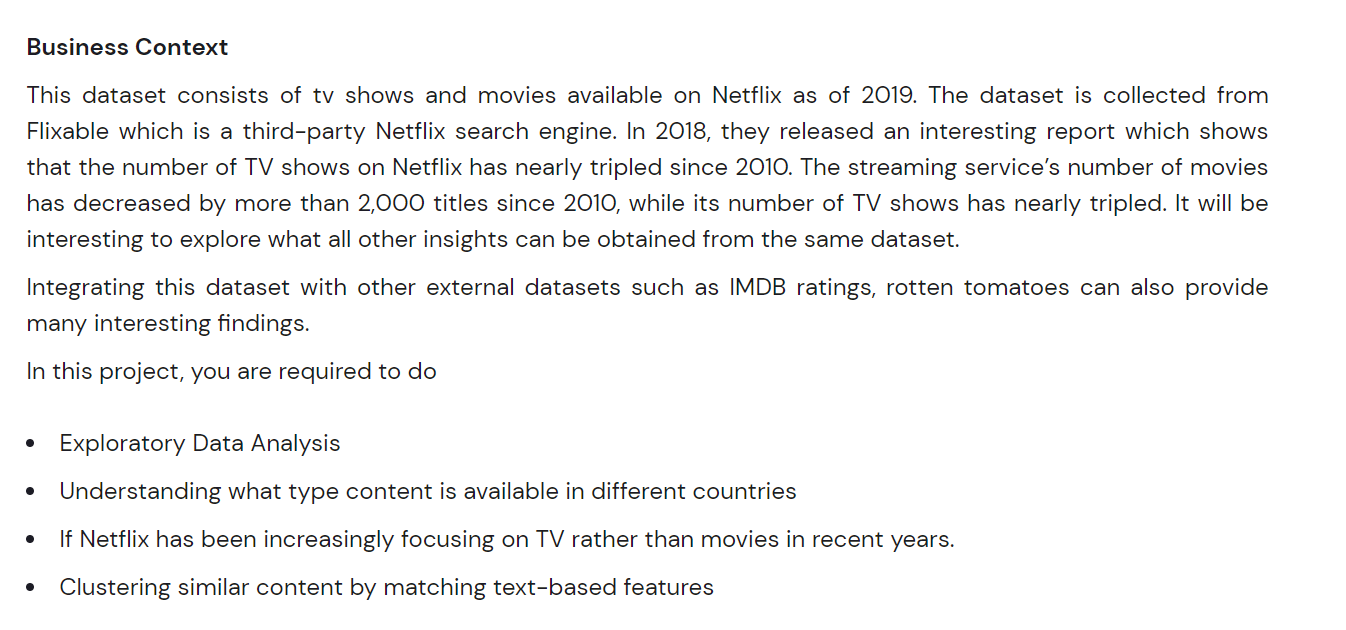

Netflix variable.png

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import Libraries
# Data Maipulation Libraries
import numpy as np
import pandas as pd
import datetime as dt

# Data Visualisation Libraray
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
%matplotlib inline

# libraries used to process textual data
import string
string.punctuation
import nltk
nltk.download('punkt')
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# libraries used to implement clusters
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram

# Library of warnings would assist in ignoring warnings issued
import warnings;warnings.filterwarnings('ignore')
import warnings;warnings.simplefilter('ignore')

[nltk_data] Downloading package punkt to C:\Users\Ankur
[nltk_data]     Bhatt\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Dataset Loading

In [4]:
df=pd.read_csv("Netflix customers data.csv")

### Dataset First View

In [5]:
# Dataset First Look
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
print(df.isna().sum())
print('--'*50)
print('Percentage of null values in each columns : ')
print((df.isna().sum()/df.shape[0])*100,'%')

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64
----------------------------------------------------------------------------------------------------
Percentage of null values in each columns : 
show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64 %


In [10]:
# Visualizing the missing values
plt.figure(figsize=(10,7))
ax=sns.barplot(x=df.columns,y=df.isna().sum(),palette='Set2')
for label in ax.containers:
    ax.bar_label(label)
plt.grid(alpha=0.5)
plt.xticks(rotation=45)
plt.show()


### What did you know about your dataset?

The dataset for Netflix Movies and TV Shows Clustering is comprised of 12 columns, with just a single column having an integer data type. It's worth noting that the dataset does not include any duplicate values. Nevertheless, there are null values present in five columns, namely director, cast, country, date_added, and rating.






## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [12]:
# Dataset Describe
df.describe(include='all').T

count unique  \
show_id         7787   7787   
type            7787      2   
title           7787   7787   
director        5398   4049   
cast            7069   6831   
country         7280    681   
date_added      7777   1565   
release_year  7787.0    NaN   
rating          7780     14   
duration        7787    216   
listed_in       7787    492   
description     7787   7769   

                                                            top  freq  \
show_id                                                      s1     1   
type                                                      Movie  5377   
title                                                        3%     1   
director                                 Raúl Campos, Jan Suter    18   
cast                                         David Attenborough    18   
country                                           United States  2555   
date_added                                      January 1, 2020   118   
release_year                                                NaN   NaN   
rating                                                    TV-MA  2863   
duration                                               1 Season  1608   
listed_in                                         Documentaries   334   
description   Multiple women report their husbands as missin...     3   

                    mean       std     min     25%     50%     75%     max  
show_id              NaN       NaN     NaN     NaN     NaN     NaN     NaN  
type                 NaN       NaN     NaN     NaN     NaN     NaN     NaN  
title                NaN       NaN     NaN     NaN     NaN     NaN     NaN  
director             NaN       NaN     NaN     NaN     NaN     NaN     NaN  
cast                 NaN       NaN     NaN     NaN     NaN     NaN     NaN  
country              NaN       NaN     NaN     NaN     NaN     NaN     NaN  
date_added           NaN       NaN     NaN     NaN     NaN     NaN     NaN  
release_year  2013.93258  8.757395  1925.0  2013.0  2017.0  2018.0  2021.0  
rating               NaN       NaN     NaN     NaN     NaN     NaN     NaN  
duration             NaN       NaN     NaN     NaN     NaN     NaN     NaN  
listed_in            NaN       NaN     NaN     NaN     NaN     NaN     NaN  
description          NaN       NaN     NaN     NaN     NaN     NaN     NaN

### Variables Description

The variable description of the Netflix Movies and TV Shows Clustering Dataset is as follows:

1. **show_id**: Unique identifier for each movie/show.

2. **type**: Indicates whether the entry is a movie or a TV show.
3. **title**: Name of the movie or TV show.
4. **director**: Name of the director(s) of the movie or TV show.
5. **cast**: Names of the actors and actresses featured in the movie or TV show.
6. **country**: Country or countries where the movie or TV show was produced.
7. **date_added**: Date when the movie or TV show was added to Netflix.
8. **release_year**: Year when the movie or TV show was released.
9. **rating**: TV rating or movie rating of the movie or TV show.
10. **duration**: Length of the movie or TV show in minutes or seasons.
11. **listed_in**: Categories or genres of the movie or TV show.
12. **description**: Brief synopsis or summary of the movie or TV show.

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

### 1. Handling null values

In [14]:
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

1. To handle null values in the 'director' and 'cast' columns, we can replace them with the value 'Unknown'. This ensures that missing information in these columns is still captured in the dataset.
2. For the 'country' column, we can fill the null values with the country that appears most frequently in the dataset, using the mode.
3. Since the 'date_added' and 'rating' columns have a relatively small number of null values, an alternative approach would be to drop the observations (rows) that have null values in these columns from our analysis.

In [15]:
df[['director','cast']]=df[['director','cast']].fillna('Unknown')
df['country']=df['country'].fillna(df['country'].mode()[0])
df.dropna(axis=0, inplace=True)

In [16]:
df.shape

(7770, 12)

In [17]:
df.duplicated().sum()

0

### 2. Handling nested columns i.e 'director', 'cast', 'listed_in' and 'country'

In [18]:
# Let's create a copy of dataframe and unnest the original one
df_new= df.copy()

In [19]:
df.shape

(7770, 12)

In [20]:
# Unnesting 'Directors' column
dir=df['director'].apply(lambda x: str(x).split(',')).tolist()
df1=pd.DataFrame(dir,index=df['title'])
df1=df1.stack()
df1=pd.DataFrame(df1.reset_index())
df1.rename(columns={0:'Directors'},inplace=True)
df1 = df1.drop(['level_1'],axis=1)
df1.sample(10)

title              Directors
1735                  Dark Places  Gilles Paquet-Brenner
6709             The Bridge Curse             Lester Hsi
3127                         I Am                   Onir
6739                    The Chase                Unknown
1376              Charlotte's Web     Charles A. Nichols
1845           Despite Everything    Gabriela Tagliavini
1013                  Bittersweet           Khaled Marei
910   Bert Kreischer: Secret Time          Todd Biermann
2800    Hamara Dil Aapke Paas Hai         Satish Kaushik
5587                    Resurface            Wynn Padula

In [21]:
df1.shape

(8487, 2)

In [22]:
# Unnesting 'cast' column
cast=df['cast'].apply(lambda x: str(x).split(',')).tolist()
df2=pd.DataFrame(cast,index=df['title'])
df2=df2.stack()
df2=pd.DataFrame(df2.reset_index())
df2.rename(columns={0:'Actors'},inplace=True)
df2 = df2.drop(['level_1'],axis=1)
df2.sample(10)

title                     Actors
27166          Love, Death & Robots   Kevin Michael Richardson
23594               K.O. One Re-act                 Nylon Chen
16303                 Forget Me Not                    Unknown
18037           Good and Prosperous                 Ahmed Adel
28059                  Mango Dreams            Ram Gopal Bajaj
34669             Pieces of a Woman              Ellen Burstyn
31409  Mystery Science Theater 3000                 Jim Mallon
39849       Shootout at Lokhandwala          Shabbir Ahluwalia
6046                Bedtime Stories               Allen Covert
46339                     The Hater         Vanessa Aleksander

In [23]:
df2.shape

(56563, 2)

In [24]:
# Unnesting 'listed_in' column
lst=df['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
df3 = pd.DataFrame(lst, index = df['title'])
df3 = df3.stack()
df3 = pd.DataFrame(df3.reset_index())
df3.rename(columns={0:'Genre'},inplace=True)
df3 = df3.drop(['level_1'],axis=1)
df3.sample(10)

title                     Genre
14558                               The Mayo Clinic             Documentaries
4778                                     First Kiss      International Movies
9295                          Mr. Peabody & Sherman  Children & Family Movies
15288  The War: A Film by Ken Burns and Lynn Novick                Docuseries
1771                                      Before 30         Romantic TV Shows
5751                                 Harry & Bunnie                  Kids' TV
7413                                  Kingdom of Us             Documentaries
3155                                    Coach Snoop                Docuseries
2509                                  Burning Sands                    Dramas
1513                                       Bad Boys                  Comedies

In [25]:
df3.shape

(17042, 2)

In [26]:
# Unnesting 'country' column
country=df['country'].apply(lambda x: str(x).split(', ')).tolist()
df4 = pd.DataFrame(country, index = df['title'])
df4 = df4.stack()
df4 = pd.DataFrame(df4.reset_index())
df4.rename(columns={0:'Country'},inplace=True)
df4 = df4.drop(['level_1'],axis=1)
df4.sample(10)

title         Country
7038                        Stree           India
2720         Forgive Us Our Debts          Poland
1719              Cleopatra Jones   United States
8204   The Only Mother To You All     Philippines
3539  I Am Vengeance: Retaliation  United Kingdom
4509        Losing Sight of Shore           Samoa
3933                Julie & Julia   United States
7027               Strange Voices   United States
2860    Gameboys Level-Up Edition   United States
5113                   Mr. Church   United States

In [27]:
df4.shape

(9553, 2)

#### **Merging**:

In [28]:
## Merging all the unnested dataframes
# Merging director and cast
df5 = df2.merge(df1,on=['title'],how='inner')

# Merging listed_in with merged of (director and cast)
df6 = df5.merge(df3,on=['title'],how='inner')

# Merging country with merged of [listed_in with merged of (director and cast)]
df7 = df6.merge(df4,on=['title'],how='inner')

# Head of final merged dataframe
df7.head()

title             Actors Directors                   Genre Country
0    3%        João Miguel   Unknown  International TV Shows  Brazil
1    3%        João Miguel   Unknown               TV Dramas  Brazil
2    3%        João Miguel   Unknown     TV Sci-Fi & Fantasy  Brazil
3    3%   Bianca Comparato   Unknown  International TV Shows  Brazil
4    3%   Bianca Comparato   Unknown               TV Dramas  Brazil

In [29]:
df7.shape

(175807, 5)

In [30]:
# Final DataFrame:
df=df7.merge(df[['type', 'title', 'date_added', 'release_year', 'rating', 'duration','description']],on=['title'],how='left')
df.head()

title             Actors Directors                   Genre Country     type  \
0    3%        João Miguel   Unknown  International TV Shows  Brazil  TV Show   
1    3%        João Miguel   Unknown               TV Dramas  Brazil  TV Show   
2    3%        João Miguel   Unknown     TV Sci-Fi & Fantasy  Brazil  TV Show   
3    3%   Bianca Comparato   Unknown  International TV Shows  Brazil  TV Show   
4    3%   Bianca Comparato   Unknown               TV Dramas  Brazil  TV Show   

        date_added  release_year rating   duration  \
0  August 14, 2020          2020  TV-MA  4 Seasons   
1  August 14, 2020          2020  TV-MA  4 Seasons   
2  August 14, 2020          2020  TV-MA  4 Seasons   
3  August 14, 2020          2020  TV-MA  4 Seasons   
4  August 14, 2020          2020  TV-MA  4 Seasons   

                                         description  
0  In a future where the elite inhabit an island ...  
1  In a future where the elite inhabit an island ...  
2  In a future where the elite inhabit an island ...  
3  In a future where the elite inhabit an island ...  
4  In a future where the elite inhabit an island ...

In [31]:
df.shape

(175807, 11)

### 3. Changing datatype

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175807 entries, 0 to 175806
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   title         175807 non-null  object
 1   Actors        175807 non-null  object
 2   Directors     175807 non-null  object
 3   Genre         175807 non-null  object
 4   Country       175807 non-null  object
 5   type          175807 non-null  object
 6   date_added    175807 non-null  object
 7   release_year  175807 non-null  int64 
 8   rating        175807 non-null  object
 9   duration      175807 non-null  object
 10  description   175807 non-null  object
dtypes: int64(1), object(10)
memory usage: 16.1+ MB


In [33]:
# 'date_added' column:
df['date_added']=pd.to_datetime(df['date_added'])
# Extracting  day, month and year from date_added column
df["day_added"]= df["date_added"].dt.day
df["month_added"]= df["date_added"].dt.month
df["year_added"]= df["date_added"].dt.year

# Dropping date_added
df.drop('date_added', axis=1, inplace=True)

# removing 'min' and 'Seasons' from the end in 'duration' column:
df['duration']= df['duration'].apply(lambda x: int(x.split()[0]))


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175807 entries, 0 to 175806
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   title         175807 non-null  object
 1   Actors        175807 non-null  object
 2   Directors     175807 non-null  object
 3   Genre         175807 non-null  object
 4   Country       175807 non-null  object
 5   type          175807 non-null  object
 6   release_year  175807 non-null  int64 
 7   rating        175807 non-null  object
 8   duration      175807 non-null  int64 
 9   description   175807 non-null  object
 10  day_added     175807 non-null  int64 
 11  month_added   175807 non-null  int64 
 12  year_added    175807 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 18.8+ MB


### 4. Binning of Rating variable

In rating columns we have different categories these are content rating classifications that are commonly used in the United States and other countries to indicate the appropriateness of media content for different age groups. Let's understand each of them and binnig them accordingly:

**TV-MA**: This rating is used for mature audiences only, and it may contain strong language, violence, nudity, and sexual content.

**R**: This rating is used for movies that are intended for audiences 17 and older. It may contain graphic violence, strong language, drug use, and sexual content.

**PG-13**: This rating is used for movies that may not be suitable for children under 13. It may contain violence, mild to moderate language, and suggestive content.

**TV-14**: This rating is used for TV shows that may not be suitable for children under 14. It may contain violence, strong language, sexual situations, and suggestive dialogue.

**TV-PG**: This rating is used for TV shows that may not be suitable for children under 8. It may contain mild violence, language, and suggestive content.

**NR**: This stands for "Not Rated." It means that the content has not been rated by a rating board, and it may contain material that is not suitable for all audiences.

**TV-G**: This rating is used for TV shows that are suitable for all ages. It may contain some mild violence, language, and suggestive content.

**TV-Y**: This rating is used for children's TV shows that are suitable for all ages. It is intended to be appropriate for preschool children.

**TV-Y7**: This rating is used for children's TV shows that may not be suitable for children under 7. It may contain mild violence and scary content.

**PG**: This rating is used for movies that may not be suitable for children under 10. It may contain mild language, some violence, and some suggestive content.

**G**: This rating is used for movies that are suitable for general audiences. It may contain some mild language and some violence.

**NC-17**: This rating is used for movies that are intended for adults only. It may contain explicit sexual content, violence, and language.

**TV-Y7-FV**: This rating is used for children's TV shows that may not be suitable for children under 7. It may contain fantasy violence.

**UR**: This stands for "Unrated." It means that the content has not been rated by a rating board, and it may contain material that is not suitable for all audiences.

Let's not complicate it and create bins as following:
* **Adult Content**: TV-MA, NC-17, R
* **Children Content**:  TV-PG, PG, TV-G, G
* **Teen Content**: PG-13, TV-14
* **Family-friendly Content**: TV-Y, TV-Y7, TV-Y7-FV
* **Not Rated**: NR, UR

In [35]:
# Binning the values in the rating column
rating_map = {'TV-MA':'Adult Content',
              'R':'Adult Content',
              'PG-13':'Teen Content',
              'TV-14':'Teen Content',
              'TV-PG':'Children Content',
              'NR':'Not Rated',
              'TV-G':'Children Content',
              'TV-Y':'Family-friendly Content',
              'TV-Y7':'Family-friendly Content',
              'PG':'Children Content',
              'G':'Children Content',
              'NC-17':'Adult Content',
              'TV-Y7-FV':'Family-friendly Content',
              'UR':'Not Rated'}

df['rating'].replace(rating_map, inplace = True)
df['rating'].unique()

array(['Adult Content', 'Teen Content', 'Children Content', 'Not Rated',
       'Family-friendly Content'], dtype=object)

In [36]:
df.sample(3)

title             Actors        Directors  \
73949                       Kardec   Sandra Corveloni  Wagner de Assis   
75229                    King Jack       Cory Nichols   Felix Thompson   
92127  Monopoly (The Bank Of Luck)   Mohammed Tharwat   Ahmed El Gendy   

                      Genre        Country   type  release_year  \
73949                Dramas         Brazil  Movie          2019   
75229                Dramas  United States  Movie          2015   
92127  International Movies          Egypt  Movie          2017   

              rating  duration  \
73949   Teen Content       110   
75229      Not Rated        81   
92127  Adult Content       117   

                                             description  day_added  \
73949  In Catholic 19th-century France, professor Léo...         29   
75229  Already coping with a bully, a mercurial older...          1   
92127  Seeking revenge on his employer, a lazy bank a...         15   

       month_added  year_added  
73949            8        2019  
75229            7        2016  
92127            6        2019

### 5. Separating Movies and TV Shows

In [37]:
# Spearating the dataframes for further analysis
df_movies= df[df['type']== 'Movie']
df_tvshows= df[df['type']== 'TV Show']

# Printing the shape
print(df_movies.shape, df_tvshows.shape)

(126079, 13) (49728, 13)


### What all manipulations have you done and insights you found?

We have divided data wrangling into five different sections:
1. In this section we have imputed/drop the null values of:
  * Imputed 'director' and 'cast' with 'Unknown'.
  * Imputed 'country' with Mode.
  * Drop null values of 'date_added' and 'rating' .
2. We have unnested values from following features:
    * 'director'
    * 'cast'
    * 'listed_in'
    * 'country'

    We have unnested the values and stored in different dataframes and then  merged all the dataframe with the original one using left join in order to get the isolated values of each of the feature.
3.* We have changed  the data type of  following features:
    * 'duration' into integer (Removing min and seasons from the values).
    * 'date_added' to datetime (Into the required format).
  * We have also extracted the following features:
    * 'date' from 'date_added'.
    * 'month' from 'date_added'.
    * 'year' from 'date_added'.
4. We have seen that the 'rating' column contains various coded categories, so  we have decided to create 5 bins and distribute the values accordingly:
    * **Adult**: TV-MA, NC-17
    * **Restricted**: R, UR
    * **Teen**: PG-13, TV-14
    * **All Ages**: TV-G, TV-Y, TV-Y7, TV-Y7-FV, PG, G, TV-PG
    * **Not Rated**: NR
5. Lastly we have splitted the dataframe into two df one is 'df_movies' that contains only Movies and the other is 'df_tvshows' that contains only TV Shows for our further analysis.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

Movie      126079
TV Show     49728
Name: type, dtype: int64


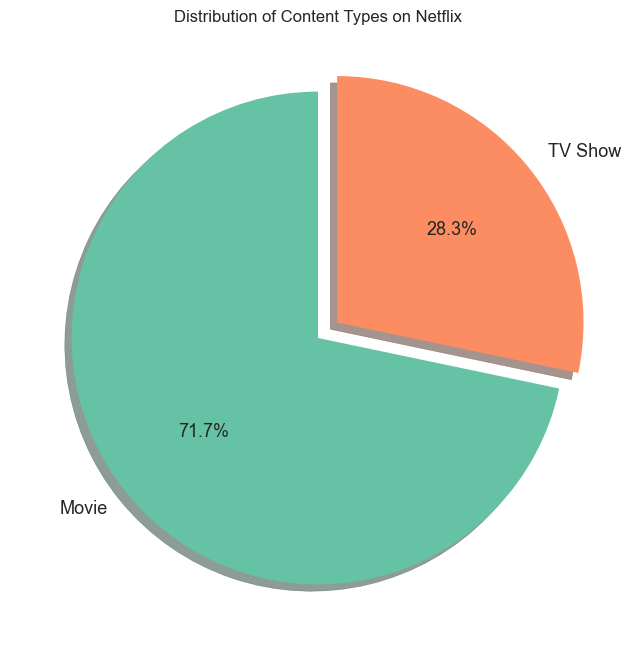

In [38]:
# Chart - 1 visualization code
print(df['type'].value_counts())

plt.figure(figsize=(12,8))
plt.pie(df['type'].value_counts(),labels=df['type'].value_counts().index, startangle=90,colors=sns.color_palette("Set2"),explode=[0,0.1],shadow=True,autopct="%1.1f%%",textprops = {'fontsize':13})
plt.title('Distribution of Content Types on Netflix')
plt.show()

##### 1. Why did you pick the specific chart?

This Chart  shows us the percentage  of TV shows and movies data present on Netflix Dataset.

##### 2. What is/are the insight(s) found from the chart?


The data reveals that movies constitute the predominant portion of Netflix's content, comprising approximately 71.7% of the total offerings. Conversely, TV shows account for the remaining 28.3% of the dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Insights on Netflix's content distribution (71.7% movies, 28.3% TV shows) can guide strategic decisions in content acquisition, original production, user engagement, and targeted marketing, potentially leading to positive business impact.

#### Chart - 2

In [39]:
df.head()

title             Actors Directors                   Genre Country     type  \
0    3%        João Miguel   Unknown  International TV Shows  Brazil  TV Show   
1    3%        João Miguel   Unknown               TV Dramas  Brazil  TV Show   
2    3%        João Miguel   Unknown     TV Sci-Fi & Fantasy  Brazil  TV Show   
3    3%   Bianca Comparato   Unknown  International TV Shows  Brazil  TV Show   
4    3%   Bianca Comparato   Unknown               TV Dramas  Brazil  TV Show   

   release_year         rating  duration  \
0          2020  Adult Content         4   
1          2020  Adult Content         4   
2          2020  Adult Content         4   
3          2020  Adult Content         4   
4          2020  Adult Content         4   

                                         description  day_added  month_added  \
0  In a future where the elite inhabit an island ...         14            8   
1  In a future where the elite inhabit an island ...         14            8   
2  In a future where the elite inhabit an island ...         14            8   
3  In a future where the elite inhabit an island ...         14            8   
4  In a future where the elite inhabit an island ...         14            8   

   year_added  
0        2020  
1        2020  
2        2020  
3        2020  
4        2020

In [40]:
df_movies.head()

title           Actors          Directors                 Genre Country  \
33  7:19    Demián Bichir  Jorge Michel Grau                Dramas  Mexico   
34  7:19    Demián Bichir  Jorge Michel Grau  International Movies  Mexico   
35  7:19   Héctor Bonilla  Jorge Michel Grau                Dramas  Mexico   
36  7:19   Héctor Bonilla  Jorge Michel Grau  International Movies  Mexico   
37  7:19    Oscar Serrano  Jorge Michel Grau                Dramas  Mexico   

     type  release_year         rating  duration  \
33  Movie          2016  Adult Content        93   
34  Movie          2016  Adult Content        93   
35  Movie          2016  Adult Content        93   
36  Movie          2016  Adult Content        93   
37  Movie          2016  Adult Content        93   

                                          description  day_added  month_added  \
33  After a devastating earthquake hits Mexico Cit...         23           12   
34  After a devastating earthquake hits Mexico Cit...         23           12   
35  After a devastating earthquake hits Mexico Cit...         23           12   
36  After a devastating earthquake hits Mexico Cit...         23           12   
37  After a devastating earthquake hits Mexico Cit...         23           12   

    year_added  
33        2016  
34        2016  
35        2016  
36        2016  
37        2016

In [41]:
df_tvshows.head()

title             Actors Directors                   Genre Country     type  \
0    3%        João Miguel   Unknown  International TV Shows  Brazil  TV Show   
1    3%        João Miguel   Unknown               TV Dramas  Brazil  TV Show   
2    3%        João Miguel   Unknown     TV Sci-Fi & Fantasy  Brazil  TV Show   
3    3%   Bianca Comparato   Unknown  International TV Shows  Brazil  TV Show   
4    3%   Bianca Comparato   Unknown               TV Dramas  Brazil  TV Show   

   release_year         rating  duration  \
0          2020  Adult Content         4   
1          2020  Adult Content         4   
2          2020  Adult Content         4   
3          2020  Adult Content         4   
4          2020  Adult Content         4   

                                         description  day_added  month_added  \
0  In a future where the elite inhabit an island ...         14            8   
1  In a future where the elite inhabit an island ...         14            8   
2  In a future where the elite inhabit an island ...         14            8   
3  In a future where the elite inhabit an island ...         14            8   
4  In a future where the elite inhabit an island ...         14            8   

   year_added  
0        2020  
1        2020  
2        2020  
3        2020  
4        2020

In [42]:
# Chart - 2 visualization code
plt.figure(figsize=(20, 10))
datasets = [(df, 'Overall'), (df_movies, 'Movies'), (df_tvshows, 'TV Shows')]

for i, (data, label) in enumerate(datasets):
    plt.subplot(1, 3, i+1)
    count = data['rating'].value_counts()
    plt.pie(count, labels=count.index, autopct='%1.1f%%',explode=(0,0,0,0,0.5),colors=sns.color_palette("Set2"),shadow=True)
    plt.title(f"Distribution of Content Rating on Netflix '{label}'")
    plt.axis('equal')

plt.show()





##### 1. Why did you pick the specific chart?

A pie chart, was utilized to analyze the distribution of content types within Netflix. Its purpose was to determine the percentage of each content type (movies and TV shows) present on the platform.

##### 2. What is/are the insight(s) found from the chart?

* The analysis revealed that the majority of content available on Netflix falls under the Adult and Teen categories. These two categories constitute a significant portion of the content library.

* A noteworthy finding is that, in comparison to TV shows, there is a relatively lower presence of family-friendly content in the Movies category on Netflix. This suggests that TV shows offer a greater selection of content suitable for family viewing.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights regarding the content distribution on Netflix, specifically the prevalence of Adult and Teen categories and the disparity in family-friendly content between Movies and TV Shows, can potentially create a positive business impact. By catering to the preferences of their target audience and strategically addressing the content gaps, Netflix can enhance user satisfaction, attract new subscribers, and ultimately drive business growth and success.

#### Chart - 3

In [43]:
# Chart - 3 visualization code
plt.figure(figsize=(22,8))
for i,j,k in (df_movies,'Movies',1),(df_tvshows,'TV Shows',2):
  plt.subplot(1,2,k)
  k=sns.barplot(y='Directors',x='title',data=i.groupby(['Directors']).nunique().sort_values(by='title',ascending=False).reset_index()[1:11],palette='Set2')
  for label in k.containers:
            k.bar_label(label)
  plt.grid(alpha=0.3)
  plt.title(f'Top 10 Directors with maximum number of  {j}')
plt.show()




##### 1. Why did you pick the specific chart?

To know about the most popular Directors in  Movies and TV shows.

##### 2. What is/are the insight(s) found from the chart?

* We found that most of the movies directed by **Raul Campos** and **Jan Suter**.

* Most TV shows directed by **Alastair Fothergill** and **ken burns**.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Movie/tvshows producers can select the popular director for their upcoming projects.

#### Chart - 4

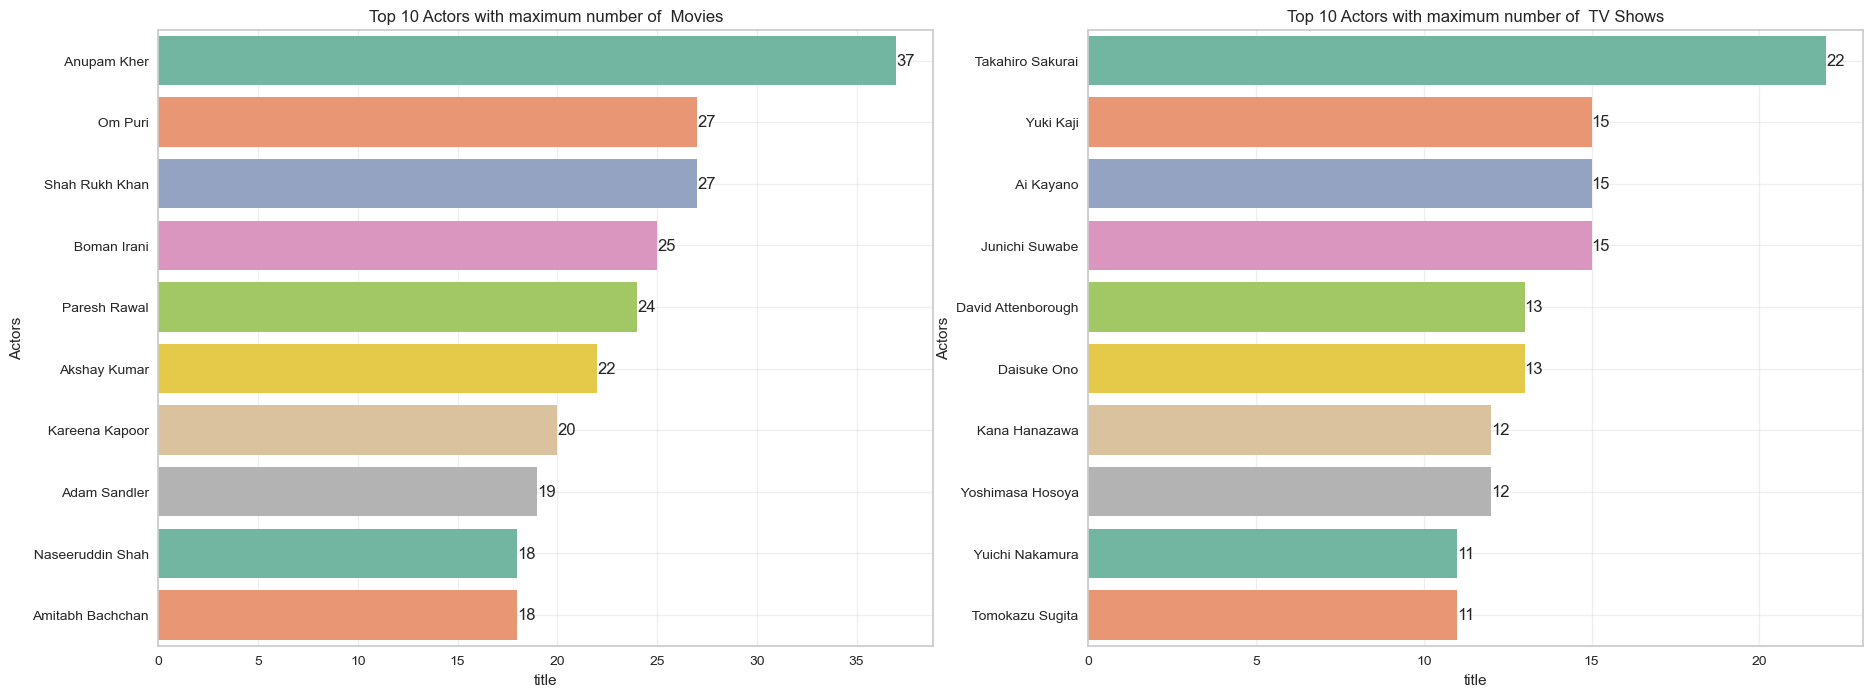

In [44]:
# Chart - 4 visualization code

plt.figure(figsize=(22,8))
for i,j,k in (df_movies,'Movies',1),(df_tvshows,'TV Shows',2):
  plt.subplot(1,2,k)
  k=sns.barplot(y='Actors',x='title',data=i.groupby('Actors').nunique().sort_values(by='title',ascending=False).reset_index()[1:11],palette='Set2')
  for label in k.containers:
            k.bar_label(label)
  plt.grid(alpha=0.3)
  plt.title(f'Top 10 Actors with maximum number of  {j}')
plt.show()


##### 1. Why did you pick the specific chart?

To know which actors are more popular on Netflix.

##### 2. What is/are the insight(s) found from the chart?

Insight: Majority of movie actors are from India, but no popular Indian actors found in TV shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Indian audiences' passion for movies makes them a lucrative target market. Businesses should focus on capturing their attention and preferences to maximize viewership and commercial success.

#### Chart - 5

In [45]:
# Chart - 5 visualization code
plt.figure(figsize=(25,8))
for i,j,k in (df_movies,'Movies',1),(df_tvshows,'TV Shows',2):
  plt.subplot(1,2,k)
  k=sns.barplot(y='Genre',x='title',data=i.groupby('Genre').nunique().sort_values(by='title',ascending=False).reset_index()[:10],palette='Set2')
  for label in k.containers:
            k.bar_label(label)
  plt.grid(alpha=0.3)
  plt.title(f'Top 10 Genre in  {j}')
plt.show()


##### 1. Why did you pick the specific chart?

To know which genre is more popular w.r.t movies/TV shows on Netflix

##### 2. What is/are the insight(s) found from the chart?

International movies/TV shows  genre is most popular in both the Movies and TV Shows category. Followed by Drama and comedy.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights about the popularity of international movies/TV shows, as well as drama and comedy genres, can potentially create a positive business impact. By aligning content production and marketing strategies to cater to these preferences, businesses can attract a larger audience and potentially boost profitability and market share.

#### Chart - 6

In [46]:
# Chart - 6 visualization code
plt.figure(figsize=(18,8))
ax=df.groupby(['Country'])['title'].nunique().sort_values(ascending=False)[:10].plot(kind='bar',color=sns.color_palette('Set2'))
for label in ax.containers:
            ax.bar_label(label)
plt.grid(alpha=0.3)
plt.title('Top 10 countries with most number of  contents on Netflix')
plt.show()

##### 1. Why did you pick the specific chart?

To know which country contribute  maximum number of contents on Netflix.

##### 2. What is/are the insight(s) found from the chart?

**United States** at the top followed by **India** in terms of most number of content contributor on Netflix.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights about the United States and India being the top contributors of content on Netflix can have a positive business impact. Understanding the content origins allows businesses to tailor their strategies to effectively cater to the preferences of these countries, potentially leading to increased viewership, subscriber retention, and revenue generation in these key markets.

#### Chart - 7

In [47]:
df.groupby(['year_added','type']).agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False)

year_added     type  title
18        2019    Movie   1497
20        2020    Movie   1312
16        2018    Movie   1255
14        2017    Movie    861
21        2020  TV Show    697
19        2019  TV Show    656
17        2018  TV Show    429
15        2017  TV Show    361
12        2016    Movie    256
13        2016  TV Show    184
22        2021    Movie     88
10        2015    Movie     58
11        2015  TV Show     30
23        2021  TV Show     29
8         2014    Movie     19
4         2011    Movie     13
9         2014  TV Show      6
6         2013    Movie      6
7         2013  TV Show      5
5         2012    Movie      3
2         2009    Movie      2
1         2008  TV Show      1
3         2010    Movie      1
0         2008    Movie      1

In [48]:
# Chart - 7 visualization code
plt.figure(figsize=(20,8))
ax=sns.barplot(x='year_added',y='title',data=df.groupby(['year_added','type']).agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False),hue='type',palette='Set2')
plt.grid(alpha=0.3)
plt.title('Type of Content added each year on Netflix')
plt.ylabel('Count')
for label in ax.containers:
            ax.bar_label(label)
plt.show()

##### 1. Why did you pick the specific chart?

To know about the Type of Content added each year on Netflix.

##### 2. What is/are the insight(s) found from the chart?

In terms of content additions, the year 2019 witnessed the highest number of movies being added to the platform, totaling 1497. Conversely, the year 2020 stands out for having the highest number of TV shows added, with a substantial count of 697. These insights highlight the significant growth and diversity of content offerings during those respective years.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights about the highest number of movie and TV show additions in specific years can potentially create a positive business impact. By leveraging these trends, businesses can strategically plan their content acquisition and production strategies, ensuring a diverse and appealing library that caters to viewer preferences and drives engagement and subscriber growth.

#### Chart - 8

In [49]:
# Chart - 8 visualization code
plt.figure(figsize=(20,8))
ax=sns.lineplot(x='month_added',y='title',data=df.groupby(['month_added','type']).agg({'title':'nunique'}).reset_index().sort_values(by='title',ascending=False),hue='type',palette='Set2', marker = 'o')
plt.grid(alpha=0.3)
plt.title('Type of Content added w.r.t month  on Netflix')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

The plot show Count of Movie/TV shows added each  month.

##### 2. What is/are the insight(s) found from the chart?

* Starting of Year(Jan)  and End of Year(Dec)  shows a high count of Movies added to Netflix.
* Month of December  shows high count of TV shows added to Netflix

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights that show a high count of movies added to Netflix at the start and end of the year, as well as a high count of TV shows added in December, can inform strategic content acquisition decisions, leading to increased user engagement and subscriber retention.

#### Chart - 9

In [50]:
# Chart - 9 visualization code
df1=df_movies.groupby('title').agg({'duration':'unique'}).reset_index()
df1['duration']=df1['duration'].apply(lambda x: x[0])
plt.figure(figsize=(10,7))
plt.title('Histplot  for Movies')
plt.hist(df1['duration'],color='y',bins=30)
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

To Know about the duration distribution of movies.

##### 2. What is/are the insight(s) found from the chart?

Most of the Movies on Netflix  fall under category of duration between 90 min to 120 min.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights about the majority of movies on Netflix falling within the duration of 90 to 120 minutes can help in curating and acquiring content that aligns with user preferences, leading to increased viewer satisfaction and engagement, thereby potentially creating a positive business impact.

#### Chart - 10 - Correlation Heatmap

In [51]:
# Correlation Heatmap visualization code
# Preparing data for heatmap
df['count'] = 1
data = df.groupby('Country')[['Country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['Country']
df_heatmap = df.loc[df['Country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['Country'],df_heatmap['rating'],normalize = "index").T

# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Defining order of representation
country_order = ['United States','India','United Kingdom','Canada','France','Japan','Spain','South Korea','Germany', 'Mexico']
rating_order = ['Adult Content', 'Teen Content', 'Children Content', 'Family-friendly Content', 'Not Rated']

# calling and plotting heatmap
sns.heatmap(df_heatmap.loc[rating_order,country_order], cmap='Set2', square=True,linewidth=2.5,cbar=False,annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})
plt.show()

##### 1. Why did you pick the specific chart?

This graph shows us which countries producing which type of content the most.

##### 2. What is/are the insight(s) found from the chart?

* All  countries except India producing Adult Content in higher proportion.
* India producing high percentage of  Teen Content.
* Canada is in Top in terms of Family-friendly Content.
* 85% of content is Adult content from spain.


## ***5. Hypothesis Testing***

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis**: There is no significant difference in the proportion ratings of drama movies and comedy movies on Netflix.

**Alternative Hypothesis**: There is a significant difference in the proportion ratings of drama movies and comedy movies on Netflix.

#### 2. Perform an appropriate statistical test.

In [52]:
# Perform Statistical Test to obtain P-Value
from statsmodels.stats.proportion import proportions_ztest
# Subset the data to only include drama and comedy movies
subset = df[df['Genre'].str.contains('Dramas') | df['Genre'].str.contains('Comedies')]

# Calculate the proportion of drama and comedy movies
drama_prop = len(subset[subset['Genre'].str.contains('Dramas')]) / len(subset)
comedy_prop = len(subset[subset['Genre'].str.contains('Comedies')]) / len(subset)

# Set up the parameters for the z-test
count = [int(drama_prop * len(subset)), int(comedy_prop * len(subset))]
nobs = [len(subset), len(subset)]
alternative = 'two-sided'

# Perform the z-test
z_stat, p_value = proportions_ztest(count=count, nobs=nobs, alternative=alternative)
print('z-statistic: ', z_stat)
print('p-value: ', p_value)

# Set the significance level
alpha = 0.05

# Print the results of the z-test
if p_value < alpha:
    print(f"Reject the null hypothesis.")
else:
    print(f"Fail to reject the null hypothesis.")



z-statistic:  64.8000705213286
p-value:  0.0
Reject the null hypothesis.


We conclude that there is a significant difference in the proportion ratings of drama movies and comedy movies on Netflix.

##### Which statistical test have you done to obtain P-Value?

The statistical test we have used to obtain the P-value is the z-test for proportions.

##### Why did you choose the specific statistical test?

The z-test for proportions is utilized when we need to compare the proportions of two categorical variables, specifically drama movies and comedy movies, within a given sample. The objective is to assess whether the observed disparity in proportions is statistically significant or merely due to chance. This statistical test is chosen because it enables us to evaluate the likelihood of observing the observed difference in proportions in our sample, assuming the null hypothesis to be true. In simpler terms, it allows us to determine if the difference between the two proportions is meaningful or just a result of random variation.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis**: The average duration of TV shows added in the year 2020 on Netflix is not significantly different from the average duration of TV shows added in the year 2021.

**Alternative Hypothesis**: The average duration of TV shows added in the year 2020 on Netflix is significantly different from the average duration of TV shows added in the year 2021.

#### 2. Perform an appropriate statistical test.

In [53]:
# Perform Statistical Test to obtain P-Value
# To test this hypothesis, we perform a two-sample t-test.
from scipy.stats import ttest_ind

# Create separate dataframes for TV shows in 2020 and 2021
tv_2020 = df[(df['type'] == 'TV Show') & (df['release_year'] == 2020)]
tv_2021 = df[(df['type'] == 'TV Show') & (df['release_year'] == 2021)]

# Perform two-sample t-test
t, p = ttest_ind(tv_2020['duration'].astype(int),
                 tv_2021['duration'].astype(int), equal_var=False)
print('t-value: ', t)
print('p-value: ', p)

# Print the results
if p < 0.05:
    print('Reject null hypothesis. \nThe average duration of TV shows added in the year 2020 on Netflix is significantly different from the average duration of TV shows added in the year 2021.')
else:
    print('Failed to reject null hypothesis. \nThe average duration of TV shows added in the year 2020 on Netflix is not significantly different from the average duration of TV shows added in the year 2021.')



t-value:  -6.002151232542292
p-value:  7.23381843379902e-09
Reject null hypothesis. 
The average duration of TV shows added in the year 2020 on Netflix is significantly different from the average duration of TV shows added in the year 2021.


##### Which statistical test have you done to obtain P-Value?

The statistical test used to obtain the P-Value is a two-sample t-test.

##### Why did you choose the specific statistical test?

The two-sample t-test was chosen because we are comparing the means of two different samples (TV shows added in 2020 vs TV shows added in 2021) to determine whether they are significantly different. Additionally, we assume that the two samples have unequal variances since it is unlikely that the duration of TV shows added in 2020 and 2021 would have the exact same variance.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [54]:
# Handling Missing Values & Missing Value Imputation
df.isna().sum()

title           0
Actors          0
Directors       0
Genre           0
Country         0
type            0
release_year    0
rating          0
duration        0
description     0
day_added       0
month_added     0
year_added      0
count           0
dtype: int64

No Null Values found.

In [55]:
df.head()

title             Actors Directors                   Genre Country     type  \
0    3%        João Miguel   Unknown  International TV Shows  Brazil  TV Show   
1    3%        João Miguel   Unknown               TV Dramas  Brazil  TV Show   
2    3%        João Miguel   Unknown     TV Sci-Fi & Fantasy  Brazil  TV Show   
3    3%   Bianca Comparato   Unknown  International TV Shows  Brazil  TV Show   
4    3%   Bianca Comparato   Unknown               TV Dramas  Brazil  TV Show   

   release_year         rating  duration  \
0          2020  Adult Content         4   
1          2020  Adult Content         4   
2          2020  Adult Content         4   
3          2020  Adult Content         4   
4          2020  Adult Content         4   

                                         description  day_added  month_added  \
0  In a future where the elite inhabit an island ...         14            8   
1  In a future where the elite inhabit an island ...         14            8   
2  In a future where the elite inhabit an island ...         14            8   
3  In a future where the elite inhabit an island ...         14            8   
4  In a future where the elite inhabit an island ...         14            8   

   year_added  count  
0        2020      1  
1        2020      1  
2        2020      1  
3        2020      1  
4        2020      1

### 2. Handling Outliers

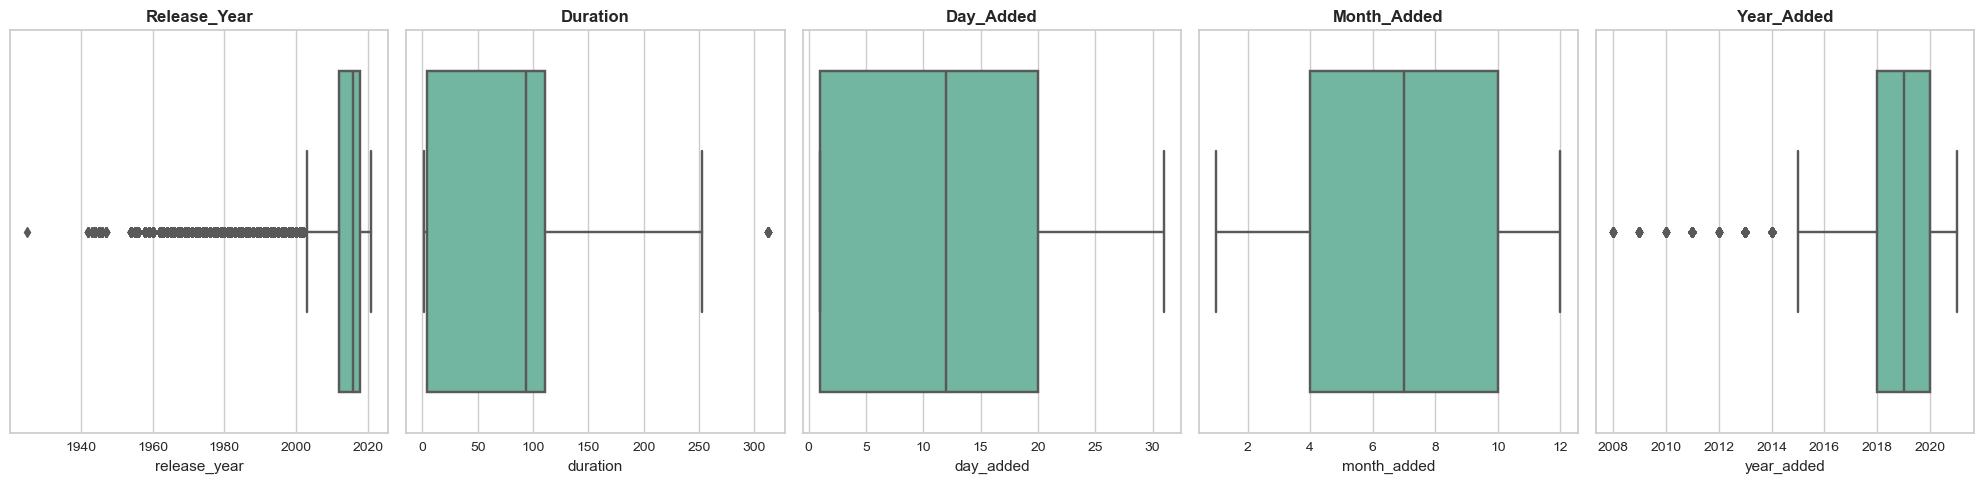

In [56]:
# Handling Outliers & Outlier treatments
numeric_features=["release_year","duration","day_added","month_added","year_added"]
plt.figure(figsize=(20,5))
for i,column in enumerate(numeric_features):
  plt.subplot(1,5,i+1)
  sns.boxplot(df[column],palette='Set2')
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()



While analyzing numeric features, it is common to encounter anomalies or outliers that deviate significantly from the majority of the data points. However, when examining features related to the release or addition of Movies/TV Shows on Netflix, we need to approach outliers differently.

In this scenario, some Movies/TV Shows may have been released or added to Netflix earlier than others, resulting in numeric values that appear as outliers. It is crucial not to dismiss these values as anomalies since they represent the unique nature of the data. These early releases or additions contribute valuable insights to our analysis and should not be treated as outliers to be excluded or treated separately.

By acknowledging and considering these unusual numeric values as valid and meaningful observations, we can gain a more comprehensive understanding of the release patterns and their impact on Netflix's content catalog.

### 3. Textual Data Preprocessing

In [57]:
df_new.sample(5)

show_id     type                              title           director  \
2362   s2363    Movie               Garuda in My Heart 2     Rudy Soedjarwo   
2248   s2249    Movie                   Four Christmases        Seth Gordon   
787     s788    Movie        Beat Bugs: All Together Now        Josh Wakely   
4889   s4890    Movie          Pocoyo & The Space Circus  Alfonso Rodríguez   
5662   s5663  TV Show  Sleepless Society: Bedtime Wishes            Unknown   

                                                   cast  \
2362  Emir Mahira, Aldo Tansani, Maudy Koesnaedi, Ra...   
2248  Vince Vaughn, Reese Witherspoon, Robert Duvall...   
787   Ashleigh Ball, Lili Beaudoin, Charles Demers, ...   
4889                           Stephen Fry, Carys Doyle   
5662  Shahkrit Yamnarm, Savika Chaiyadej, Supoj Chan...   

                     country         date_added  release_year rating  \
2362               Indonesia  November 30, 2018          2011  TV-PG   
2248  Germany, United States    January 1, 2021          2008  PG-13   
787        Australia, Canada  November 21, 2017          2017   TV-Y   
4889                   Spain        May 1, 2018          2008   TV-Y   
5662           United States   October 31, 2019          2019  TV-MA   

      duration                                          listed_in  \
2362    95 min    Children & Family Movies, Dramas, Sports Movies   
2248    88 min                          Comedies, Romantic Movies   
787     51 min         Children & Family Movies, Music & Musicals   
4889    25 min                                             Movies   
5662  1 Season  Crime TV Shows, International TV Shows, TV Dramas   

                                            description  
2362  A young soccer player sets out to prove he can...  
2248  A dating couple is forced to spend their first...  
787   After winning a local talent show, the Beat Bu...  
4889  Acrobatic aliens arrive on spaceships and perf...  
5662  During a holiday stay at a hotel resort, a fli...

In [58]:
df.shape, df_new.shape

((175807, 14), (7770, 12))

In [59]:
#  Binning of rating in new dataframe
rating_map = {'TV-MA':'Adult Content',
              'R':'Adult Content',
              'PG-13':'Teen Content',
              'TV-14':'Teen Content',
              'TV-PG':'Children Content',
              'NR':'Not Rated',
              'TV-G':'Children Content',
              'TV-Y':'Family-friendly Content',
              'TV-Y7':'Family-friendly Content',
              'PG':'Children Content',
              'G':'Children Content',
              'NC-17':'Adult Content',
              'TV-Y7-FV':'Family-friendly Content',
              'UR':'Not Rated'}

df_new['rating'].replace(rating_map, inplace = True)
df_new['rating'].unique()

array(['Adult Content', 'Teen Content', 'Children Content', 'Not Rated',
       'Family-friendly Content'], dtype=object)

1. Textual Columns

In [60]:
# Creating new feature content_detail with the help of other textual attributes
df_new["content_detail"]= df_new["cast"]+" "+df_new["director"]+" "+df_new["listed_in"]+" "+df_new["type"]+" "+df_new["rating"]+" "+df_new["country"]+" "+df_new["description"]

#checking the manipulation
df_new.head(5)

show_id     type  title           director  \
0      s1  TV Show     3%            Unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year         rating   duration  \
0    August 14, 2020          2020  Adult Content  4 Seasons   
1  December 23, 2016          2016  Adult Content     93 min   
2  December 20, 2018          2011  Adult Content     78 min   
3  November 16, 2017          2009   Teen Content     80 min   
4    January 1, 2020          2008   Teen Content    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  \
0  In a future where the elite inhabit an island ...   
1  After a devastating earthquake hits Mexico Cit...   
2  When an army recruit is found dead, his fellow...   
3  In a postapocalyptic world, rag-doll robots hi...   
4  A brilliant group of students become card-coun...   

                                      content_detail  
0  João Miguel, Bianca Comparato, Michel Gomes, R...  
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...  
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...  
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...

#### 2. Lower Casing

In [61]:
# Lower Casing
df_new['content_detail']= df_new['content_detail'].str.lower()


In [62]:
df_new.iloc[123,:]['content_detail']

"andrei selaru, dorian popa, julia marcan, ana radu, cosmin nedelcu, diana condurache, andrei gavril, luca bogdan matei dima comedies, international movies movie teen content romania to keep the band together, selly tries to earn money by making an appearance at the birthday party of a mobster's daughter — until he gets kidnapped."

#### 3. Removing Punctuations

In [63]:
# Remove Punctuations
def remove_punctuations(text):
    '''This function is used to remove the punctuations from the given sentence'''
    #imorting needed library
    import string
    # replacing the punctuations with no space, which in effect deletes the punctuation marks.
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped off punctuation marks
    return text.translate(translator)

In [64]:
# Removing Punctuations from the content_detail
df_new['content_detail']= df_new['content_detail'].apply(remove_punctuations)

# Checking the observation after manipulation
df_new.iloc[123,]['content_detail']

'andrei selaru dorian popa julia marcan ana radu cosmin nedelcu diana condurache andrei gavril luca bogdan matei dima comedies international movies movie teen content romania to keep the band together selly tries to earn money by making an appearance at the birthday party of a mobsters daughter — until he gets kidnapped'

#### 4. Removing URLs & Removing words and digits contain digits.

In [65]:
# Remove URLs & Remove words and digits contain digits
def remove_url_and_numbers(text):
    '''This function is used to remove the URL's and Numbers from the given sentence'''
    # importing needed libraries
    import re
    import string

    # Replacing the URL's with no space
    url_number_pattern = re.compile(r'https?://\S+|www\.\S+')
    text= re.sub(url_number_pattern,'', text)

    # Replacing the digits with one space
    text = re.sub('[^a-zA-Z]', ' ', text)

    # return the text stripped off URL's and Numbers
    return text

In [66]:
# Remove URLs & Remove words and digits contain digits
df_new['content_detail']= df_new['content_detail'].apply(remove_url_and_numbers)

# Checking the observation after manipulation
df_new.iloc[123,]['content_detail']

'andrei selaru dorian popa julia marcan ana radu cosmin nedelcu diana condurache andrei gavril luca bogdan matei dima comedies international movies movie teen content romania to keep the band together selly tries to earn money by making an appearance at the birthday party of a mobsters daughter   until he gets kidnapped'

#### 5. Removing Stopwords & Removing White spaces

In [67]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to C:\Users\Ankur
[nltk_data]     Bhatt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [68]:
def remove_stopwords_and_whitespaces(text):
    '''This function is used for removing the stopwords from the given sentence'''
    text = [word for word in text.split() if not word in stopwords.words('english')]

    # joining the list of words with space separator
    text=  " ".join(text)

    # removing whitespace
    text = re.sub(r'\s+', ' ', text)

    # return the manipulated string
    return text


In [69]:
df_new['content_detail']= df_new['content_detail'].apply(remove_stopwords_and_whitespaces)

In [70]:
# Checking the observation after manipulation
df_new.iloc[123,]['content_detail']

'andrei selaru dorian popa julia marcan ana radu cosmin nedelcu diana condurache andrei gavril luca bogdan matei dima comedies international movies movie teen content romania keep band together selly tries earn money making appearance birthday party mobsters daughter gets kidnapped'

#### 6. Tokenization

In [71]:
# Tokenization
nltk.download('punkt')
# Tokenization
df_new['content_detail']= df_new['content_detail'].apply(nltk.word_tokenize)

# Checking the observation after manipulation
df_new.iloc[123,]['content_detail']

[nltk_data] Downloading package punkt to C:\Users\Ankur
[nltk_data]     Bhatt\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['andrei',
 'selaru',
 'dorian',
 'popa',
 'julia',
 'marcan',
 'ana',
 'radu',
 'cosmin',
 'nedelcu',
 'diana',
 'condurache',
 'andrei',
 'gavril',
 'luca',
 'bogdan',
 'matei',
 'dima',
 'comedies',
 'international',
 'movies',
 'movie',
 'teen',
 'content',
 'romania',
 'keep',
 'band',
 'together',
 'selly',
 'tries',
 'earn',
 'money',
 'making',
 'appearance',
 'birthday',
 'party',
 'mobsters',
 'daughter',
 'gets',
 'kidnapped']

#### 7. Text Normalization

In [72]:
# Downloading needed libraries
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')


# Normalizing Text (i.e., Stemming, Lemmatization etc.)
from nltk.stem import WordNetLemmatizer

# Creating instance for wordnet
wordnet  = WordNetLemmatizer()


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Ankur Bhatt\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to C:\Users\Ankur
[nltk_data]     Bhatt\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [73]:
def lemmatizing_sentence(text):
    '''This function is used for lemmatizing (changing the given word into meaningfull word) the words from the given sentence'''
    text = [wordnet.lemmatize(word) for word in text]

    # joining the list of words with space separator
    text=  " ".join(text)

    # return the manipulated string
    return text

In [74]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to C:\Users\Ankur
[nltk_data]     Bhatt\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [75]:
# Rephrasing text by applying defined lemmatizing function
df_new['content_detail']= df_new['content_detail'].apply(lemmatizing_sentence)

# Checking the observation after manipulation
df_new.iloc[123,]['content_detail']

'andrei selaru dorian popa julia marcan ana radu cosmin nedelcu diana condurache andrei gavril luca bogdan matei dima comedy international movie movie teen content romania keep band together selly try earn money making appearance birthday party mobster daughter get kidnapped'

##### Which text normalization technique have you used and why?

We have used Lemmatization instead of Stemming for our project because:

1. **Lemmatization produces a more accurate base word**: Unlike Stemming, which simply removes the suffix from a word, Lemmatization looks at the meaning of the word and its context to produce a more accurate base form.

2. **Lemmatization can handle different inflections**: Lemmatization can handle various inflections of a word, including plural forms, verb tenses, and comparative forms, making it useful for natural language processing.

3. **Lemmatization produces real words**: Lemmatization always produces a real word that can be found in a dictionary, making it easier to interpret the results of text analysis.

4. **Lemmatization improves text understanding**: By reducing words to their base form, Lemmatization makes it easier to understand the context and meaning of a sentence.

5. **Lemmatization supports multiple languages**: While Stemming may only work well for English, Lemmatization is effective for many different languages, making it a more versatile text processing technique.

#### 8. Part of speech tagging

In [76]:
# POS Taging
# tokenize the text into words before POS Taging
df_new['pos_tags'] = df_new['content_detail'].apply(nltk.word_tokenize).apply(nltk.pos_tag)

# Checking the observation after manipulation
df_new.head(5)

show_id     type  title           director  \
0      s1  TV Show     3%            Unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year         rating   duration  \
0    August 14, 2020          2020  Adult Content  4 Seasons   
1  December 23, 2016          2016  Adult Content     93 min   
2  December 20, 2018          2011  Adult Content     78 min   
3  November 16, 2017          2009   Teen Content     80 min   
4    January 1, 2020          2008   Teen Content    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  \
0  In a future where the elite inhabit an island ...   
1  After a devastating earthquake hits Mexico Cit...   
2  When an army recruit is found dead, his fellow...   
3  In a postapocalyptic world, rag-doll robots hi...   
4  A brilliant group of students become card-coun...   

                                      content_detail  \
0  jo miguel bianca comparato michel gomes rodolf...   
1  demi n bichir h ctor bonilla oscar serrano aza...   
2  tedd chan stella chung henley hii lawrence koh...   
3  elijah wood john c reilly jennifer connelly ch...   
4  jim sturgess kevin spacey kate bosworth aaron ...   

                                            pos_tags  
0  [(jo, NN), (miguel, NN), (bianca, NN), (compar...  
1  [(demi, NN), (n, CC), (bichir, NN), (h, NN), (...  
2  [(tedd, NN), (chan, NN), (stella, NN), (chung,...  
3  [(elijah, RB), (wood, NN), (john, NN), (c, VBP...  
4  [(jim, NN), (sturgess, NN), (kevin, NN), (spac...

#### 9. Text Vectorization

In [77]:
# Vectorizing Text
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating instance
tfidfv = TfidfVectorizer(max_features=20000)

In [78]:
# Fitting on TfidfVectorizer
x= tfidfv.fit_transform(df_new['content_detail'])

# Checking shape of the formed document matrix
print(x.shape)

(7770, 20000)


##### Which text vectorization technique have you used and why?

TF-IDF vectorization has been adopted instead of the traditional Bag of Words approach due to its ability to capture the significance of individual words within a document. By considering both term frequency and inverse document frequency, TF-IDF assigns greater weights to rare words that are exclusive to a specific document, thereby emphasizing their importance in the overall representation.

### 4. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

In textual data processing, there are 20,000 arrtibutes are created in text vectorization and this huge amount of columns cannot be dealed with our local machines. So, we will using the Principal Component Analysis(PCA) techniques to reduce the dimensions of this huge sparse matrix.

In [79]:
# DImensionality Reduction
# Importing PCA from sklearn

from sklearn.decomposition import PCA
pca=PCA()
pca.fit(x.toarray())

variance= pca.explained_variance_ratio_
print(f"Explained variance: {variance}")

Explained variance: [1.59030757e-02 4.39256288e-03 3.59020601e-03 ... 8.47754122e-34
 6.44485995e-34 4.66304072e-34]


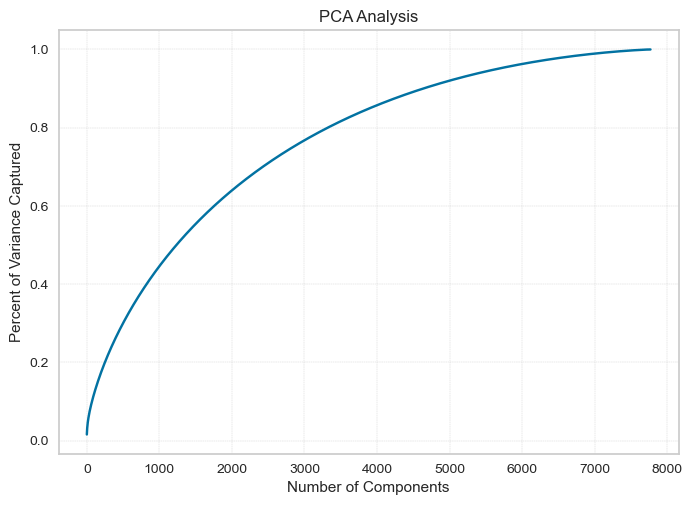

In [80]:
# Ploting the percent of variance captured versus the number of components in order to determine the reduced dimensions
fig, ax = plt.subplots()
ax.plot(range(1, len(variance)+1), np.cumsum(pca.explained_variance_ratio_))
ax.set_xlabel('Number of Components')
ax.set_ylabel('Percent of Variance Captured')
ax.set_title('PCA Analysis')
plt.grid(linestyle='--', linewidth=0.3)
plt.show()

The plot demonstrates that 7770 principal components can capture 100% of the variance. However, for our case, we will focus on selecting the number of principal components that can capture 95% of the variance, ensuring a more efficient and practical representation of the data.

In [81]:
# Now we are passing the argument so that we can capture 95% of variance.
# Defining instance
pca_tuned = PCA(n_components=0.95)

# Fitting and transforming the model
pca_tuned.fit(x.toarray())
x_transformed = pca_tuned.transform(x.toarray())

# Checking the shape of transformed matrix
x_transformed.shape


(7770, 5651)

In [83]:
df_new

show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0               Unknown  João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2          Gilbert Chan  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3           Shane Acker  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4        Robert Luketic  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
...                 ...                                                ...   
7782        Josef Fares  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783        Mozez Singh  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784            Unknown                                            Nasty C   
7785            Unknown                         Adriano Zumbo, Rachel Khoo   
7786           Sam Dunn                                            Unknown   

                                                country          date_added  \
0                                                Brazil     August 14, 2020   
1                                                Mexico   December 23, 2016   
2                                             Singapore   December 20, 2018   
3                                         United States   November 16, 2017   
4                                         United States     January 1, 2020   
...                                                 ...                 ...   
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                      United States  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year            rating   duration  \
0             2020     Adult Content  4 Seasons   
1             2016     Adult Content     93 min   
2             2011     Adult Content     78 min   
3             2009      Teen Content     80 min   
4             2008      Teen Content    123 min   
...            ...               ...        ...   
7782          2005     Adult Content     99 min   
7783          2015      Teen Content    111 min   
7784          2019     Adult Content     44 min   
7785          2019  Children Content   1 Season   
7786          2019     Adult Content     90 min   

                                              listed_in  \
0     International TV Shows, TV Dramas, TV Sci-Fi &...   
1                          Dramas, International Movies   
2                   Horror Movies, International Movies   
3     Action & Adventure, Independent Movies, Sci-Fi...   
4                                                Dramas   
...                                                 ...   
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

    

In [84]:
df

title             Actors Directors  \
0                                            3%        João Miguel   Unknown   
1                                            3%        João Miguel   Unknown   
2                                            3%        João Miguel   Unknown   
3                                            3%   Bianca Comparato   Unknown   
4                                            3%   Bianca Comparato   Unknown   
...                                         ...                ...       ...   
175802  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS            Unknown  Sam Dunn   
175803  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS            Unknown  Sam Dunn   
175804  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS            Unknown  Sam Dunn   
175805  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS            Unknown  Sam Dunn   
175806  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS            Unknown  Sam Dunn   

                         Genre         Country     type  release_year  \
0       International TV Shows          Brazil  TV Show          2020   
1                    TV Dramas          Brazil  TV Show          2020   
2          TV Sci-Fi & Fantasy          Brazil  TV Show          2020   
3       International TV Shows          Brazil  TV Show          2020   
4                    TV Dramas          Brazil  TV Show          2020   
...                        ...             ...      ...           ...   
175802           Documentaries          Canada    Movie          2019   
175803           Documentaries   United States    Movie          2019   
175804        Music & Musicals  United Kingdom    Movie          2019   
175805        Music & Musicals          Canada    Movie          2019   
175806        Music & Musicals   United States    Movie          2019   

               rating  duration  \
0       Adult Content         4   
1       Adult Content         4   
2       Adult Content         4   
3       Adult Content         4   
4       Adult Content         4   
...               ...       ...   
175802  Adult Content        90   
175803  Adult Content        90   
175804  Adult Content        90   
175805  Adult Content        90   
175806  Adult Content        90   

                                              description  day_added  \
0       In a future where the elite inhabit an island ...         14   
1       In a future where the elite inhabit an island ...         14   
2       In a future where the elite inhabit an island ...         14   
3       In a future where the elite inhabit an island ...         14   
4       In a future where the elite inhabit an island ...         14   
...                                                   ...        ...   
175802  This documentary delves into the mystique behi...          1   
175803  This documentary delves into the mystique behi...          1   
175804  This documentary delves into the mystique behi...          1   
175805  This documentary delves into the mystique behi...          1   
175806  This documentary delves into the mystique behi...          1   

        month_added  year_added  count  
0                 8        2020      1  
1                 8        2020      1  
2                 8        2020      1  
3                 8        2020      1  
4                 8        2020      1  
...             ...         ...    ...  
175802            3        2020      1  
175803            3        2020      1  
175804            3        2020      1  
175805            3        2020      1  
175806            3        2020      1  

[175807 rows x 14 columns]

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

The utilization of Principal Component Analysis (PCA) as a technique for dimensionality reduction has proven highly valuable. By identifying the principal components that encapsulate the maximum variation within the data, PCA effectively condenses high-dimensional datasets while preserving the essential information. This popular method is favored for its simplicity, computational efficiency, and wide accessibility in data analysis software. Moreover, PCA's extensive study and robust theoretical foundation make it a reliable and well-established approach.

## ***7. ML Model Implementation***

### ML Model - 1  (**K-Means Clustering**)

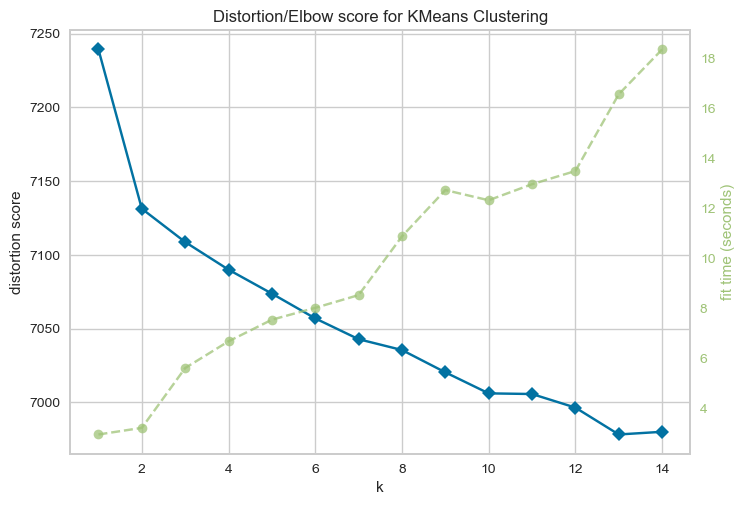

<AxesSubplot:title={'center':'Distortion/Elbow score for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [85]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model,k=(1,15),locate_elbow=False , title = "Distortion/Elbow score for KMeans Clustering")

visualizer.fit(x_transformed)
visualizer.show()

Here it seems that the elbow is forming at the 2 clusters but before blindly believing it let's plot one more chart that itterates over the same number of cluters and determines the Silhouette Score at every point.

The **silhouette score** is a measure of how similar an object is to its own cluster compared to other clusters. It is used to evaluate the quality of clustering, where a higher score indicates that objects are more similar to their own cluster and dissimilar to other clusters.

The **silhouette score ranges from -1 to 1**, where a score of 1 indicates that the object is well-matched to its own cluster, and poorly-matched to neighboring clusters. Conversely, a score of -1 indicates that the object is poorly-matched to its own cluster, and well-matched to neighboring clusters.

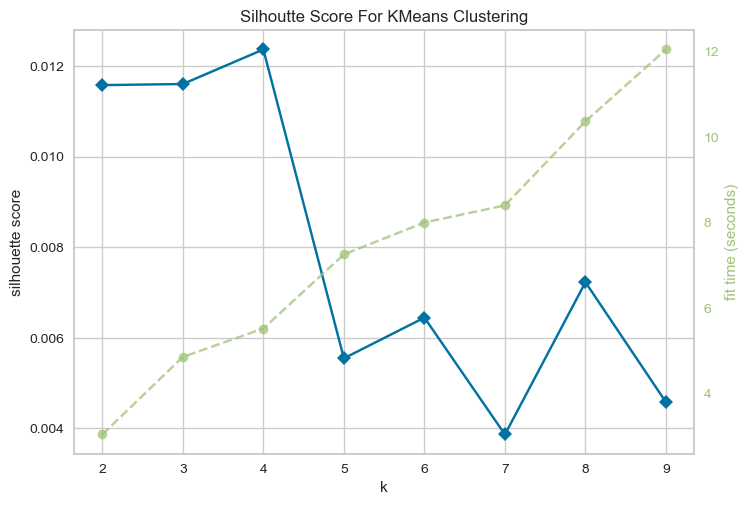

<AxesSubplot:title={'center':'Silhoutte Score For KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [86]:
# Instantiate the clustering  visualizer
visualizer = KElbowVisualizer(model,k=(2,10),metric='silhouette',title = "Silhoutte Score For KMeans Clustering",
                              timings=True,locate_elbow=False)

visualizer.fit(x_transformed)
visualizer.show()

In [87]:
# Computing Silhouette score for each k
from sklearn.metrics import silhouette_score
k_range = range(2,8)
for k in k_range:
  Kmodel = KMeans(n_clusters=k)
  labels = Kmodel.fit_predict(x_transformed)
  score = silhouette_score(x_transformed,labels)
  print(f'k={k}, Silhouette score={score:.6f}')
  print("---"*40)
  




k=2, Silhouette score=0.011582
------------------------------------------------------------------------------------------------------------------------
k=3, Silhouette score=0.011931
------------------------------------------------------------------------------------------------------------------------
k=4, Silhouette score=0.012335
------------------------------------------------------------------------------------------------------------------------
k=5, Silhouette score=0.005548
------------------------------------------------------------------------------------------------------------------------
k=6, Silhouette score=0.003120
------------------------------------------------------------------------------------------------------------------------
k=7, Silhouette score=0.005886
------------------------------------------------------------------------------------------------------------------------


From the above plots (Elbow plot and Sillhouette plot) it is very clear that the Silhoutte score is comparatively good for 4 number of clusters, so we will consider 4 cluster in kmeans analysis.

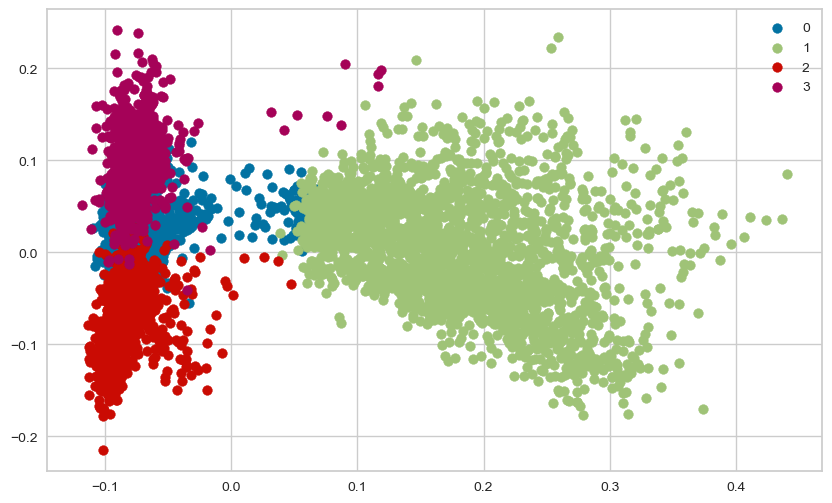

In [88]:
#training the K-means model on a dataset
kmeans = KMeans(n_clusters=4, init='k-means++', random_state= 0)

#predict the labels of clusters.
plt.figure(figsize=(10,6), dpi=100)
label = kmeans.fit_predict(x_transformed)
#Getting unique labels
unique_labels = np.unique(label)

#plotting the results:
for i in unique_labels:
    plt.scatter(x_transformed[label == i , 0] , x_transformed[label == i , 1] , label = i)
plt.legend()
plt.show()

Let's plot the above figure in 3D using mplot3d library and see if we are getting the separated clusters.

In [89]:
# Importing library to visualize clusters in 3D
from mpl_toolkits.mplot3d import Axes3D

# Plot the clusters in 3D
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b', 'y']
for i in range(len(colors)):
    ax.scatter(x_transformed[kmeans.labels_ == i, 2], x_transformed[kmeans.labels_ == i, 0], x_transformed[kmeans.labels_ == i, 1], c=colors[i])

# Rotate the plot 30 degrees around the X axis and 45 degrees around the Z axis
ax.view_init(elev=20, azim=-120)
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.show()

In [90]:
# Add cluster values to the dateframe.
df_new['kmeans_cluster'] = kmeans.labels_

In [91]:
df_new.head()

show_id     type  title           director  \
0      s1  TV Show     3%            Unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year         rating   duration  \
0    August 14, 2020          2020  Adult Content  4 Seasons   
1  December 23, 2016          2016  Adult Content     93 min   
2  December 20, 2018          2011  Adult Content     78 min   
3  November 16, 2017          2009   Teen Content     80 min   
4    January 1, 2020          2008   Teen Content    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  \
0  In a future where the elite inhabit an island ...   
1  After a devastating earthquake hits Mexico Cit...   
2  When an army recruit is found dead, his fellow...   
3  In a postapocalyptic world, rag-doll robots hi...   
4  A brilliant group of students become card-coun...   

                                      content_detail  \
0  jo miguel bianca comparato michel gomes rodolf...   
1  demi n bichir h ctor bonilla oscar serrano aza...   
2  tedd chan stella chung henley hii lawrence koh...   
3  elijah wood john c reilly jennifer connelly ch...   
4  jim sturgess kevin spacey kate bosworth aaron ...   

                                            pos_tags  kmeans_cluster  
0  [(jo, NN), (miguel, NN), (bianca, NN), (compar...               1  
1  [(demi, NN), (n, CC), (bichir, NN), (h, NN), (...               2  
2  [(tedd, NN), (chan, NN), (stella, NN), (chung,...               2  
3  [(elijah, RB), (wood, NN), (john, NN), (c, VBP...               0  
4  [(jim, NN), (sturgess, NN), (kevin, NN), (spac...               0

#### 1. Explain the ML Model used and it's performance.

In [92]:
def kmeans_wordcloud(cluster_number, column_name):
    '''function for Building a wordcloud for the movie/shows'''

    #Importing libraries
    from wordcloud import WordCloud, STOPWORDS

    # Filter the data by the specified cluster number and column name
    df_wordcloud = df_new[['kmeans_cluster', column_name]].dropna()
    df_wordcloud = df_wordcloud[df_wordcloud['kmeans_cluster'] == cluster_number]
    df_wordcloud = df_wordcloud[df_wordcloud[column_name].str.len() > 0]

    # Combine all text documents into a single string
    text = " ".join(word for word in df_wordcloud[column_name])

    # Create the word cloud
    wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(text)

    # Convert the wordcloud to a numpy array
    image_array = wordcloud.to_array()

    # Return the numpy array
    return image_array

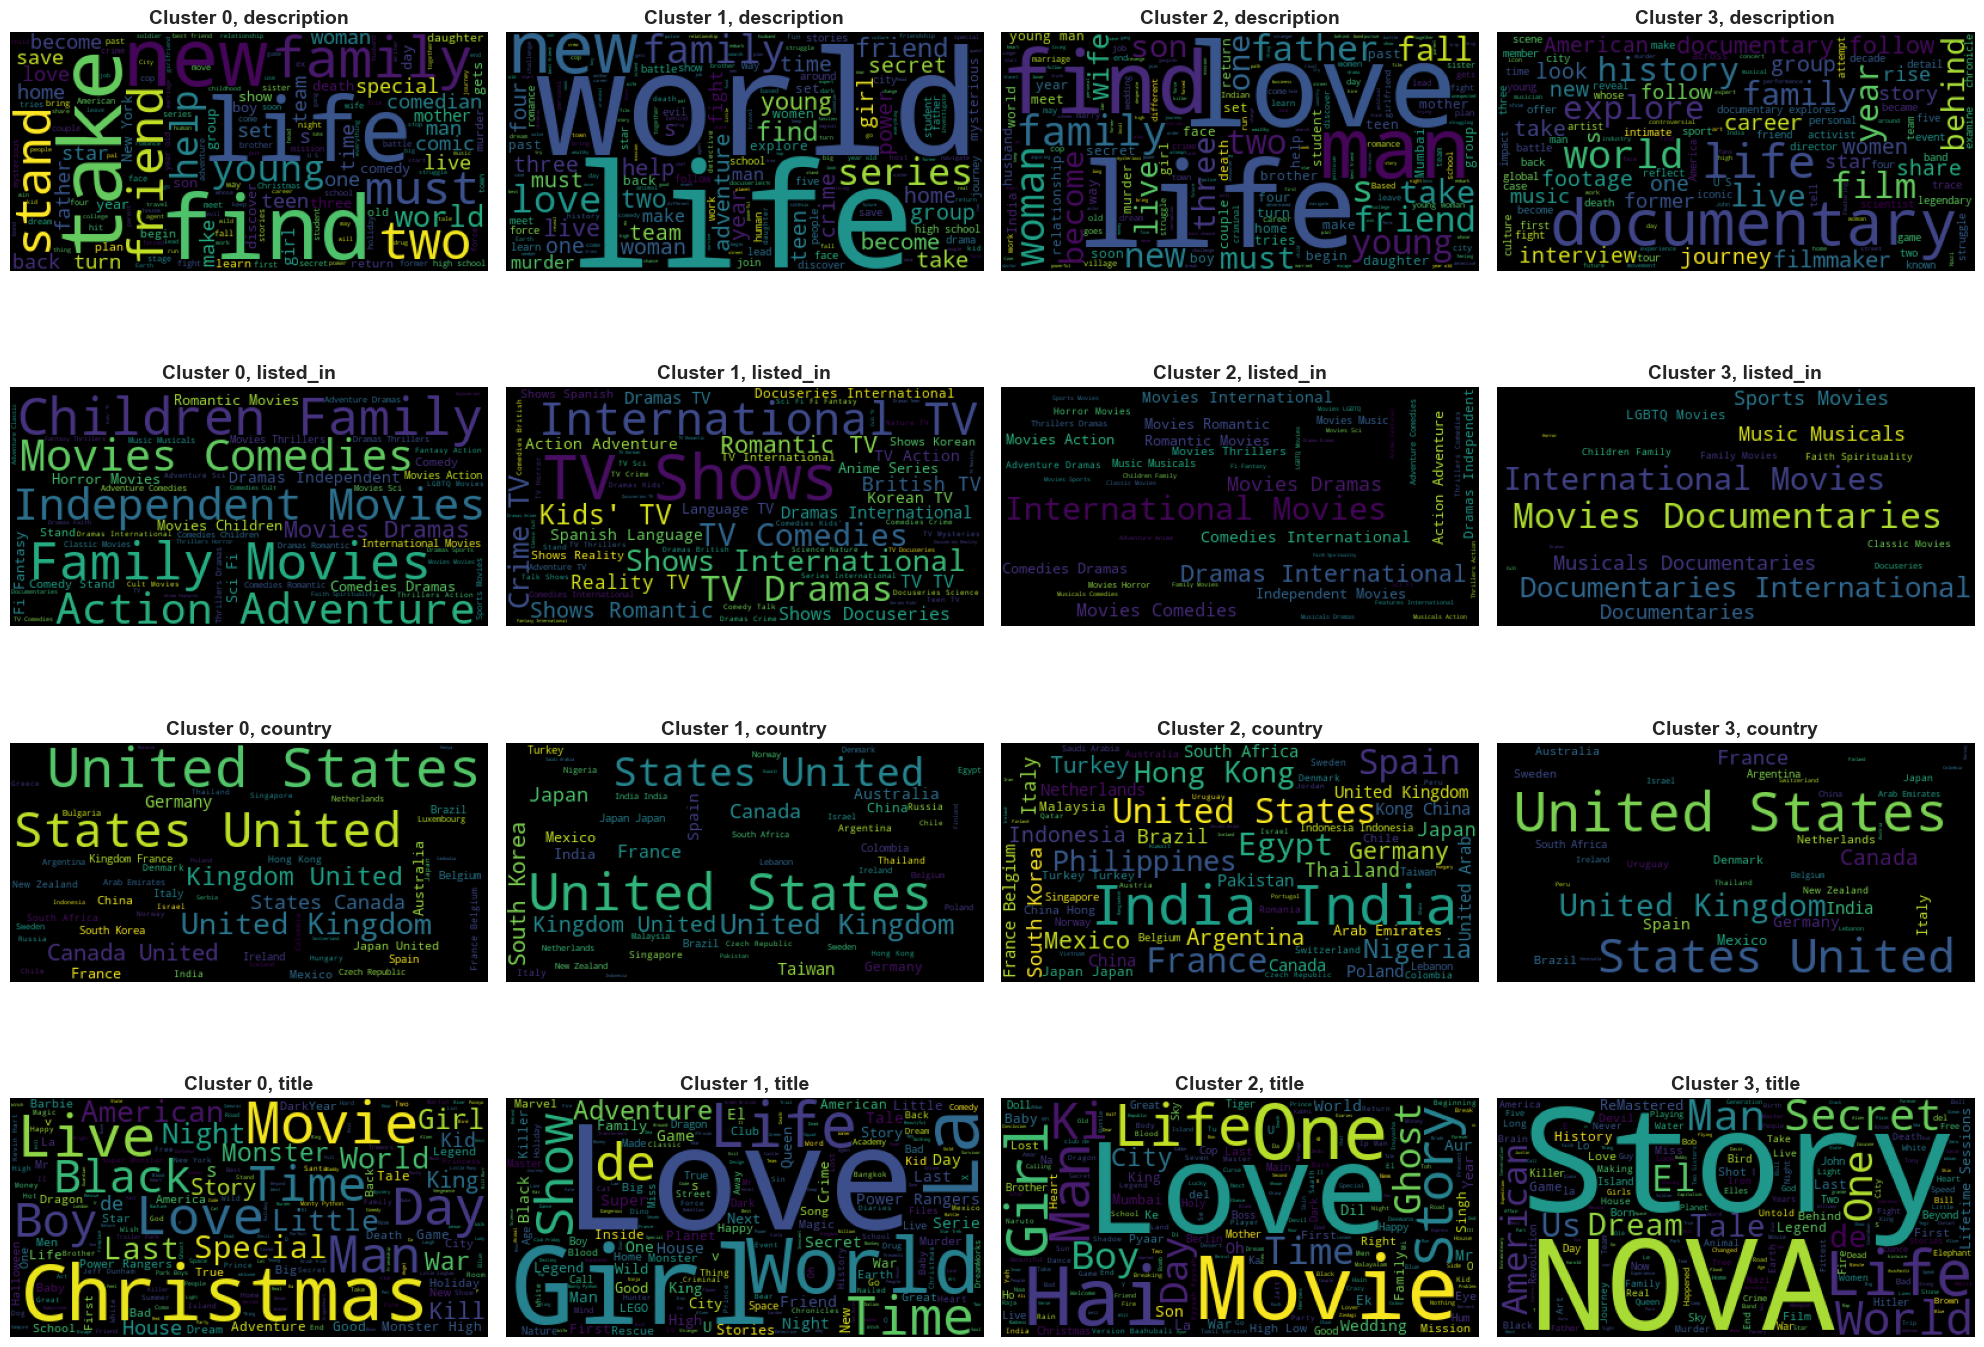

In [93]:
# Implementing the above defined function and plotting the wordcloud of each attribute
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20, 15))
for i in range(4):
    for j, col in enumerate(['description', 'listed_in', 'country', 'title']):
        axs[j][i].imshow(kmeans_wordcloud(i, col))
        axs[j][i].axis('off')
        axs[j][i].set_title(f'Cluster {i}, {col}',fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### ML Model - 2 (**Hierarchial Clustering**)

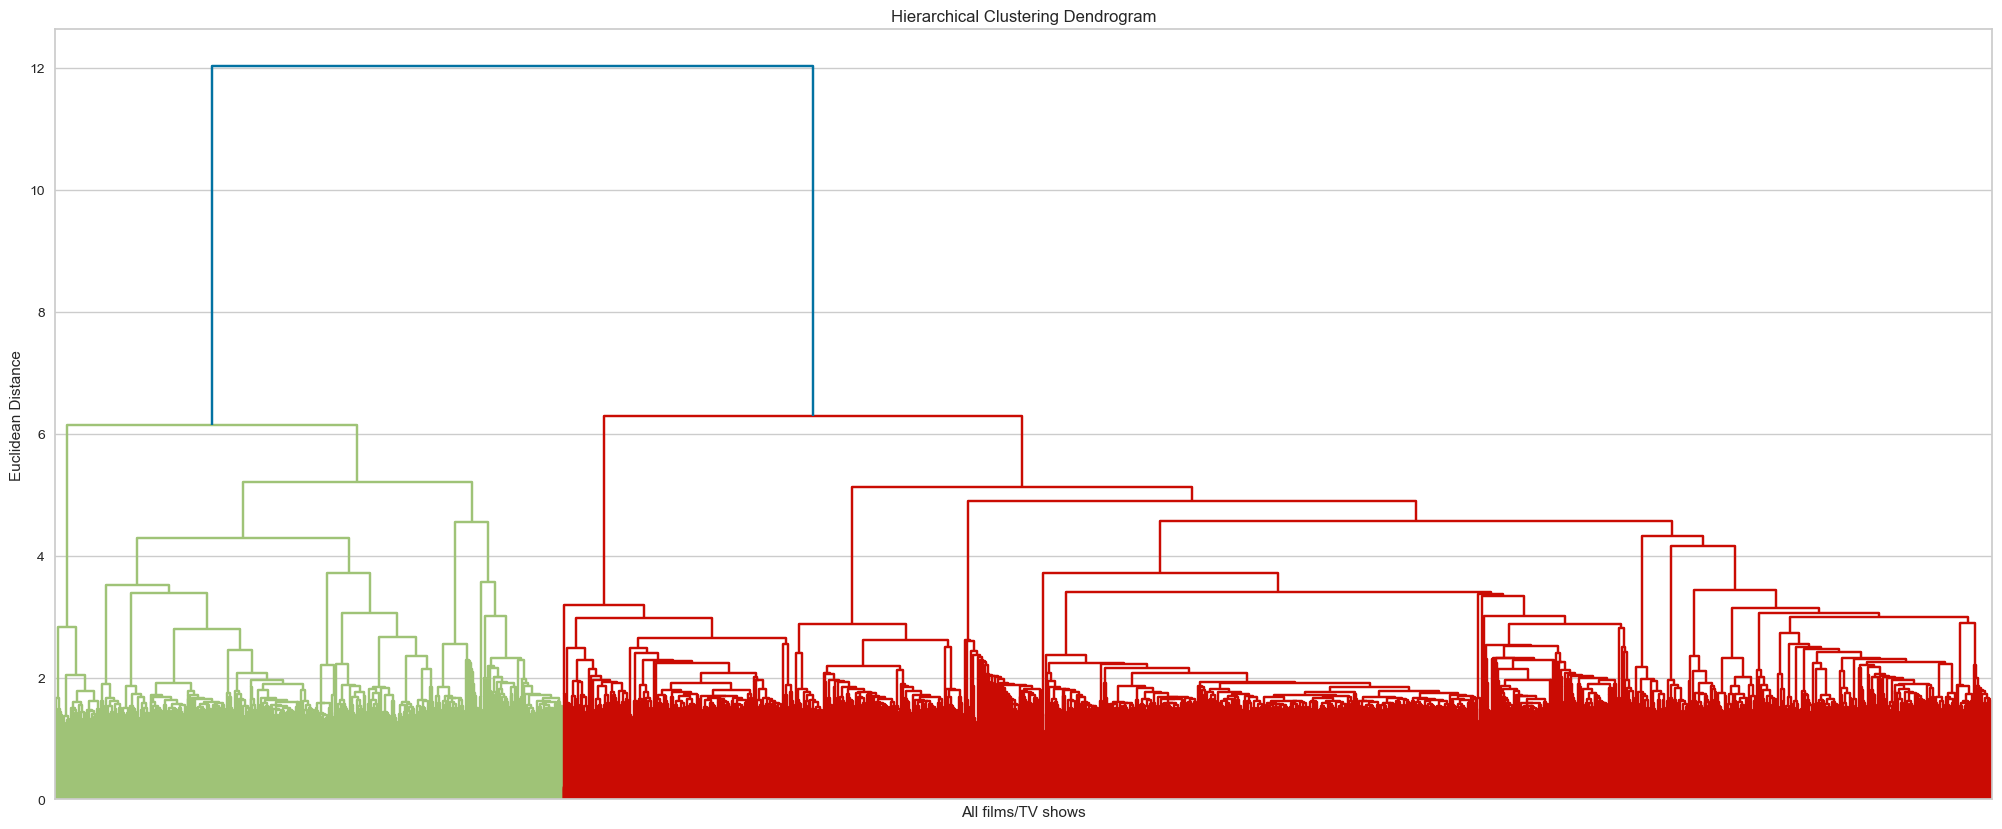

In [94]:
from scipy.cluster.hierarchy import linkage, dendrogram

# HIERARCHICAL CLUSTERING
distances_linkage = linkage(x_transformed, method = 'ward', metric = 'euclidean')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('All films/TV shows')
plt.ylabel('Euclidean Distance')

dendrogram(distances_linkage, no_labels = True)
plt.show()

* A dendrogram is a tree-like diagram that records the sequences of merges or splits.More the distance of the vertical lines in the dendrogram, more the distance between those clusters.
* From the above Dendogram we can say that optimal value of clusters is 2. But before assigning the values to respective clusters, let's check the silhouette scores using Agglomerative clustering and follow the bottom up approach to aggregate the datapoints.

In [95]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Range selected from dendrogram above
k_range = range(2,6)
for k in k_range:
    model = AgglomerativeClustering(n_clusters=k)
    labels = model.fit_predict(x_transformed)
    score = silhouette_score(x_transformed, labels)
    print("k=%d, Silhouette score=%f" % (k, score))

k=2, Silhouette score=0.006363
k=3, Silhouette score=0.006803
k=4, Silhouette score=-0.000727
k=5, Silhouette score=-0.000100


From the above silhouette scores it is clear that the 2 clusters are optimal value (maximum Silhouette score), which is also clear from the above Dendogram that for 2 cluters the euclidean distances are maximum.

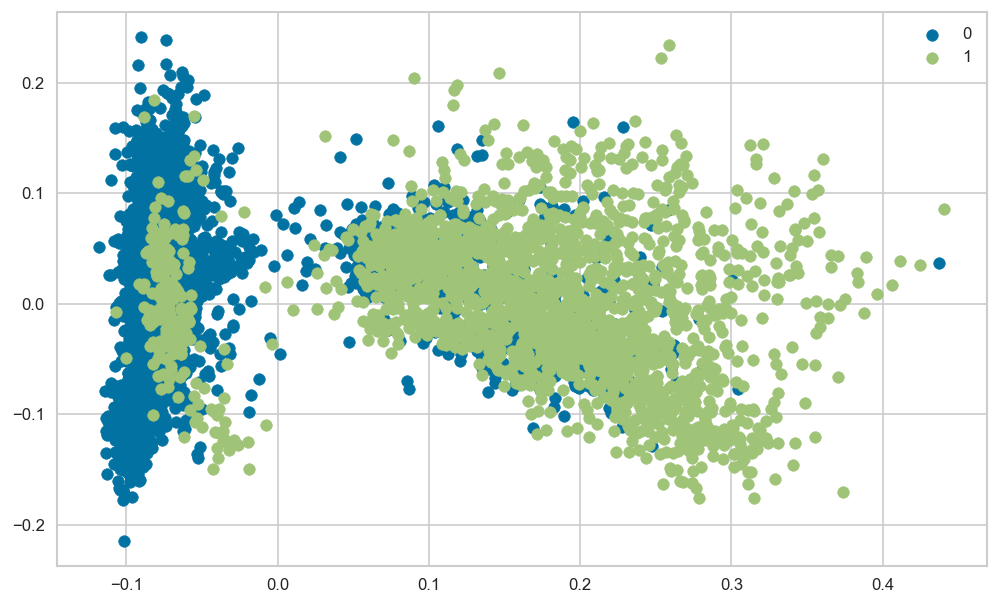

In [96]:
#training the K-means model on a dataset
Agmodel = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')

#predict the labels of clusters.
plt.figure(figsize=(10,6), dpi=120)
label = Agmodel.fit_predict(x_transformed)
#Getting unique labels
unique_labels = np.unique(label)

#plotting the results:
for i in unique_labels:
    plt.scatter(x_transformed[label == i , 0] , x_transformed[label == i , 1] , label = i)
plt.legend()
plt.show()

plotting the 3 Dimensional plot to see the clusters clearly.

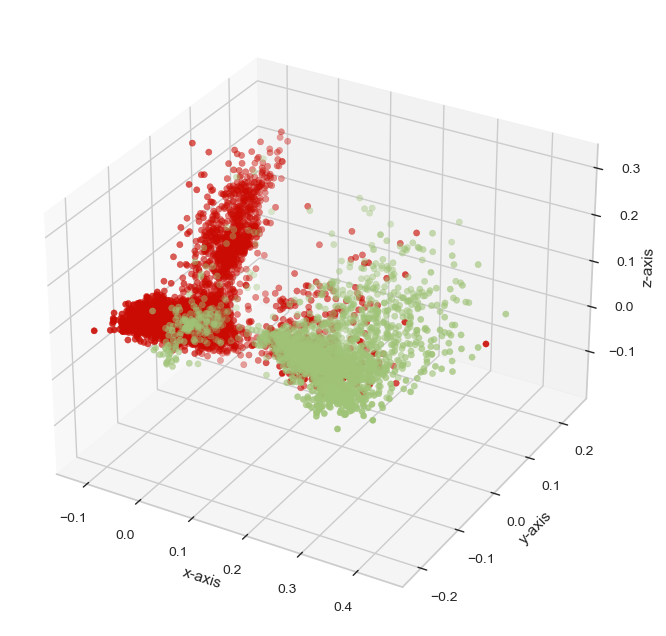

In [101]:
# Importing library to visualize clusters in 3D
from mpl_toolkits.mplot3d import Axes3D

# Plot the clusters in 3D
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b', 'y']
for i in range(len(colors)):
    ax.scatter(x_transformed[Agmodel.labels_ == i, 0], x_transformed[Agmodel.labels_ == i, 1], x_transformed[Agmodel.labels_ == i, 2],c=colors[i])
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.show()

In [104]:
# Add cluster values to the dateframe.
df_new['agglomerative_cluster'] = Agmodel.labels_

In [106]:
df_new

show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0               Unknown  João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2          Gilbert Chan  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3           Shane Acker  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4        Robert Luketic  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
...                 ...                                                ...   
7782        Josef Fares  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783        Mozez Singh  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784            Unknown                                            Nasty C   
7785            Unknown                         Adriano Zumbo, Rachel Khoo   
7786           Sam Dunn                                            Unknown   

                                                country          date_added  \
0                                                Brazil     August 14, 2020   
1                                                Mexico   December 23, 2016   
2                                             Singapore   December 20, 2018   
3                                         United States   November 16, 2017   
4                                         United States     January 1, 2020   
...                                                 ...                 ...   
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                      United States  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year            rating   duration  \
0             2020     Adult Content  4 Seasons   
1             2016     Adult Content     93 min   
2             2011     Adult Content     78 min   
3             2009      Teen Content     80 min   
4             2008      Teen Content    123 min   
...            ...               ...        ...   
7782          2005     Adult Content     99 min   
7783          2015      Teen Content    111 min   
7784          2019     Adult Content     44 min   
7785          2019  Children Content   1 Season   
7786          2019     Adult Content     90 min   

                                              listed_in  \
0     International TV Shows, TV Dramas, TV Sci-Fi &...   
1                          Dramas, International Movies   
2                   Horror Movies, International Movies   
3     Action & Adventure, Independent Movies, Sci-Fi...   
4                                                Dramas   
...                                                 ...   
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

    

#### 1. Explain the ML Model used and it's performance.

In [105]:
# Visualizing evaluation Metric Score chart
def agglomerative_wordcloud(cluster_number, column_name):
  '''function for Building a wordcloud for the movie/shows'''

  #Importing libraries
  from wordcloud import WordCloud, STOPWORDS

  # Filter the data by the specified cluster number and column name
  df_wordcloud = df_new[['agglomerative_cluster', column_name]].dropna()
  df_wordcloud = df_wordcloud[df_wordcloud['agglomerative_cluster'] == cluster_number]

  # Combine all text documents into a single string
  text = " ".join(word for word in df_wordcloud[column_name])

  # Create the word cloud
  wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="black").generate(text)

  # Return the word cloud object
  return wordcloud

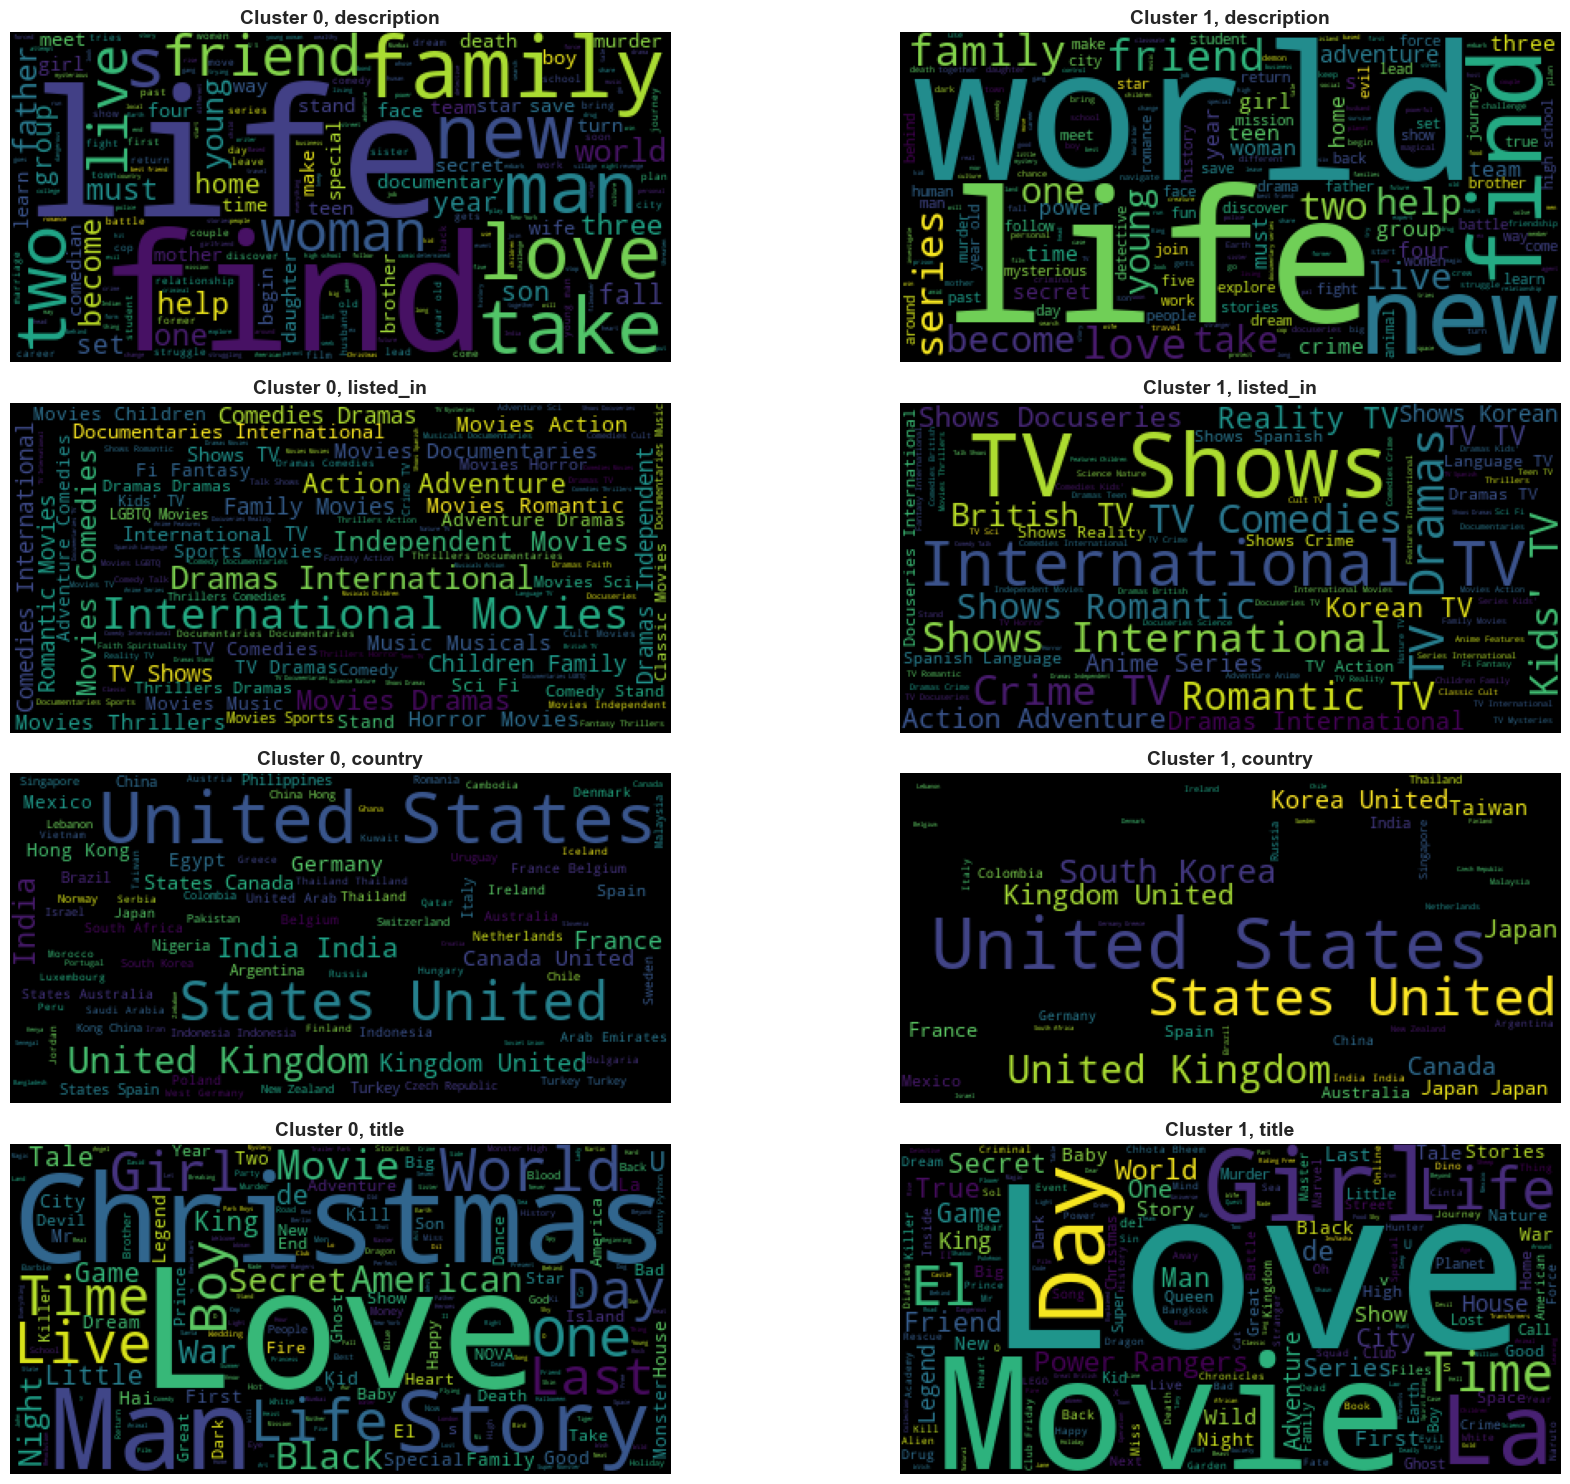

In [107]:
# Implementing the above defined function and plotting the wordcloud of each attribute
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(20, 15))
for i in range(2):
    for j, col in enumerate(['description', 'listed_in', 'country', 'title']):
        axs[j][i].imshow(agglomerative_wordcloud(i, col))
        axs[j][i].axis('off')
        axs[j][i].set_title(f'Cluster {i}, {col}',fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

We have chosen **Silhoutte Score** over **Distortion Score (also known as inertia or sum of squared distances)** as evaluation metrics as it measures how well each data point in a cluster is separated from other clusters. It ranges from -1 to 1, with higher values indicating better cluster separation. A silhouette score close to 1 indicates that the data point is well-matched to its own cluster and poorly matched to neighboring clusters. A score close to 0 indicates that the data point is on or very close to the boundary between two clusters. A score close to -1 indicates that the data point is probably assigned to the wrong cluster.

The advantages of using silhouette score over distortion score are:

* Silhouette score takes into account both the cohesion (how well data points within a cluster are similar) and separation (how well data points in different clusters are dissimilar) of the clusters, whereas distortion score only considers the compactness of each cluster.
* **Silhouette score is less sensitive to the shape of the clusters**, while distortion score tends to favor spherical clusters, and in our case the clusters are not completely spherical.
* Silhouette score provides more intuitive and interpretable results, as it assigns a score to each data point rather than just a single value for the entire clustering solution.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

We have considered K-means as our final model, as we are getting the comparatevely high Silhoutte Score in K-means clustering and the resulted clusters are very well seperated from each others as seen in the 3 dimensions.

### ML Model - 3 (**Building a Recommendation System**)

We are using Cosine similarity as it is a measure of similarity between two non-zero vectors in a multidimensional space. It measures the cosine of the angle between the two vectors, which ranges from -1 (opposite direction) to 1 (same direction), with 0 indicating orthogonality (the vectors are perpendicular to each other).

In this project we have used cosine similarity which is used to determine how similar two documents or pieces of text are. We represent the documents as vectors in a high-dimensional space, where each dimension represents a word or term in the corpus. We can then calculate the cosine similarity between the vectors to determine how similar the documents are based on their word usage.

We'll are using cosine similarity because cosine similarity handles high dimensional sparse data efficiently.

In [108]:
df_new.head()

show_id     type  title           director  \
0      s1  TV Show     3%            Unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year         rating   duration  \
0    August 14, 2020          2020  Adult Content  4 Seasons   
1  December 23, 2016          2016  Adult Content     93 min   
2  December 20, 2018          2011  Adult Content     78 min   
3  November 16, 2017          2009   Teen Content     80 min   
4    January 1, 2020          2008   Teen Content    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  \
0  In a future where the elite inhabit an island ...   
1  After a devastating earthquake hits Mexico Cit...   
2  When an army recruit is found dead, his fellow...   
3  In a postapocalyptic world, rag-doll robots hi...   
4  A brilliant group of students become card-coun...   

                                      content_detail  \
0  jo miguel bianca comparato michel gomes rodolf...   
1  demi n bichir h ctor bonilla oscar serrano aza...   
2  tedd chan stella chung henley hii lawrence koh...   
3  elijah wood john c reilly jennifer connelly ch...   
4  jim sturgess kevin spacey kate bosworth aaron ...   

                                            pos_tags  kmeans_cluster  \
0  [(jo, NN), (miguel, NN), (bianca, NN), (compar...               1   
1  [(demi, NN), (n, CC), (bichir, NN), (h, NN), (...               2   
2  [(tedd, NN), (chan, NN), (stella, NN), (chung,...               2   
3  [(elijah, RB), (wood, NN), (john, NN), (c, VBP...               0   
4  [(jim, NN), (sturgess, NN), (kevin, NN), (spac...               0   

   agglomerative_cluster  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0

In [128]:
from sklearn.metrics.pairwise import cosine_similarity

# Create a TF-IDF vectorizer object and transform the text data
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_new['content_detail'])

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix)

def recommend_content(title, cosine_sim=cosine_sim, data=df_new):
    # Get the index of the input title in the programme_list
    programme_list = data['title'].to_list()
    index = programme_list.index(title)

    # Create a list of tuples containing the similarity score and index
    # between the input title and all other programmes in the dataset
    sim_scores = list(enumerate(cosine_sim[index]))

    # Sort the list of tuples by similarity score in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:11]

    # Get the recommended movie titles and their similarity scores
    recommend_index = [i[0] for i in sim_scores]
    rec_movie = data['title'].iloc[recommend_index]
    rec_score = [round(i[1], 4) for i in sim_scores]

    # Create a pandas DataFrame to display the recommendations
    rec_table = pd.DataFrame(list(zip(rec_movie, rec_score)), columns=['Recommendation', 'Similarity_score(0-1)'])

    return rec_table

In [129]:
# Testing indian movie
recommend_content('Kuch Kuch Hota Hai')

Recommendation  Similarity_score(0-1)
0  Kabhi Khushi Kabhie Gham                 0.4352
1             Hello Brother                 0.2702
2                    Judwaa                 0.2591
3    Kabhi Alvida Naa Kehna                 0.2476
4                 Kya Kehna                 0.2240
5             Chalte Chalte                 0.2087
6                   Chaahat                 0.2019
7                    Paheli                 0.1986
8       Hum Aapke Hain Koun                 0.1962
9             Kal Ho Naa Ho                 0.1842

In [130]:
# Testing non indian movie
recommend_content('Hush')

Recommendation  Similarity_score(0-1)
0                     Before I Wake                 0.1269
1  Trigger Warning with Killer Mike                 0.1201
2    Killer Klowns from Outer Space                 0.1151
3                            Deaf U                 0.1078
4                 Oasis: Supersonic                 0.0975
5                    V for Vendetta                 0.0975
6                         Terrifier                 0.0967
7                   The Bye Bye Man                 0.0962
8                             Siren                 0.0943
9                     Swearnet Live                 0.0931

In [131]:
# Testing indian tv show
recommend_content('Khaani')

Recommendation  Similarity_score(0-1)
0                           Zindagi Kitni Haseen Hay                 0.2577
1                                     Sadqay Tumhare                 0.1833
2  Club Friday To Be Continued - My Beautiful Tomboy                 0.1465
3                                          Wrong No.                 0.1449
4                                   Teefa in Trouble                 0.1418
5                                           Humsafar                 0.1402
6                                      Pinky Memsaab                 0.1374
7                                     Killer Ratings                 0.1337
8                                             Janaan                 0.1318
9                              Tundukkan Playboy Itu                 0.1306

In [132]:
# Testing non indian tv show
recommend_content('Balto')

Recommendation  Similarity_score(0-1)
0                               Hook                 0.1407
1                           Dinotrux                 0.1288
2                Balto 2: Wolf Quest                 0.1198
3                           Vampires                 0.1149
4                 Pick of the Litter                 0.1062
5                      Hold the Dark                 0.0955
6            Jim Gaffigan: King Baby                 0.0953
7                   The Pirate Fairy                 0.0936
8                   To Be of Service                 0.0859
9  Whitney Cummings: Can I Touch It?                 0.0856

# **Conclusion**

**Based on the exploratory data analysis (EDA), we can conclude the following**:

* Movies constitute the majority (71.7%) of Netflix's content, while TV shows make up the remaining portion (28.3%).
* Adult and Teen categories are the most prevalent in Netflix's content library.
* TV shows offer a larger selection of family-friendly content compared to movies.
* Raul Campos and Jan Suter are the most frequent directors of movies, while Alastair Fothergill and Ken Burns direct many TV shows.

**In terms of machine learning analysis, we can conclude the following:**

* K-Means Clustering suggests that the optimal number of clusters for the Netflix dataset is 4, while Agglomerative Hierarchical Clustering indicates 2 clusters.
* Silhouette Score was used as the evaluation metric, which provides a more intuitive and interpretable result.
* A recommendation system was built based on similarity scores to provide personalized recommendations to improve user experience and reduce subscriber churn.

**Additionally, we found the following insights:**

* The majority of movie actors on Netflix are from India, but popular Indian actors are not commonly found in TV shows.
* International movies/TV shows are the most popular genres, followed by Drama and Comedy.
* The United States and India have the highest number of content contributors on Netflix.
* The year 2019 saw the highest number of movie additions, while 2020 had the highest number of TV show additions, indicating significant growth and diversity in content during those years.
* Most movies on Netflix have a duration between 90 to 120 minutes.
* Adult content is produced in higher proportions by all countries except India. India produces a high percentage of Teen content. Canada leads in producing family-friendly content. Spain has the highest percentage (85%) of adult content.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***